# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.5 valittaa paljon)
import warnings
warnings.filterwarnings('ignore')

# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=50_000 # size of the population to be simulated
size1=10_000_000 # number of timesteps in phase 1 training (callback not used)
size2=10_000_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=10_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_0  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include randomness in the state transitions (e.g., maternity leave)

perusmalli='best/malli_perus2'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 65
max_retirementage 70
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
deterministic False

include_putki None
step 0.25

train...
phase 1
batch 1 learning rate 0.25 scaled 0.25




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.897    |
| fps                | 1487     |
| nupdates           | 1        |
| policy_entropy     | 0.098    |
| policy_loss        | 0.00483  |
| total_timesteps    | 0        |
| value_loss         | 1.05     |
---------------------------------




---------------------------------
| explained_variance | 0.309    |
| fps                | 2320     |
| nupdates           | 20       |
| policy_entropy     | 0.00577  |
| policy_loss        | -0.0367  |
| total_timesteps    | 46759    |
| value_loss         | 26       |
---------------------------------
---------------------------------
| explained_variance | 0.886    |
| fps                | 2241     |
| nupdates           | 30       |
| policy_entropy     | 0.0772   |
| policy_loss        | -0.0911  |
| total_timesteps    | 71369    |
| value_loss         | 2.85     |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps                | 2204     |
| nupdates           | 40       |
| policy_entropy     | 0.0776   |
| policy_loss        | 0.101    |
| total_timesteps    | 95979    |
| value_loss         | 3.37     |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 2118     |
| nupdates           | 290      |
| policy_entropy     | 0.0926   |
| policy_loss        | 0.00904  |
| total_timesteps    | 711229   |
| value_loss         | 0.62     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2118     |
| nupdates           | 300      |
| policy_entropy     | 0.0797   |
| policy_loss        | 0.000808 |
| total_timesteps    | 735839   |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2118     |
| nupdates           | 310      |
| policy_entropy     | 0.221    |
| policy_loss        | -0.0321  |
| total_timesteps    | 760449   |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

----------------------------------
| explained_variance | 0.965     |
| fps                | 2114      |
| nupdates           | 560       |
| policy_entropy     | 0.143     |
| policy_loss        | -0.000738 |
| total_timesteps    | 1375699   |
| value_loss         | 0.492     |
----------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2115     |
| nupdates           | 570      |
| policy_entropy     | 0.161    |
| policy_loss        | 0.01     |
| total_timesteps    | 1400309  |
| value_loss         | 0.587    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2114     |
| nupdates           | 580      |
| policy_entropy     | 0.0595   |
| policy_loss        | -0.00217 |
| total_timesteps    | 1424919  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps

---------------------------------
| explained_variance | 0.983    |
| fps                | 2114     |
| nupdates           | 830      |
| policy_entropy     | 0.214    |
| policy_loss        | -0.0025  |
| total_timesteps    | 2040169  |
| value_loss         | 0.306    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2114     |
| nupdates           | 840      |
| policy_entropy     | 0.164    |
| policy_loss        | 0.0013   |
| total_timesteps    | 2064779  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2114     |
| nupdates           | 850      |
| policy_entropy     | 0.179    |
| policy_loss        | -0.012   |
| total_timesteps    | 2089389  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

---------------------------------
| explained_variance | 0.945    |
| fps                | 2115     |
| nupdates           | 1100     |
| policy_entropy     | 0.0976   |
| policy_loss        | 0.00106  |
| total_timesteps    | 2704639  |
| value_loss         | 0.428    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2115     |
| nupdates           | 1110     |
| policy_entropy     | 0.147    |
| policy_loss        | -0.0283  |
| total_timesteps    | 2729249  |
| value_loss         | 0.252    |
---------------------------------
----------------------------------
| explained_variance | 0.976     |
| fps                | 2115      |
| nupdates           | 1120      |
| policy_entropy     | 0.0989    |
| policy_loss        | -6.12e-06 |
| total_timesteps    | 2753859   |
| value_loss         | 0.274     |
----------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps

---------------------------------
| explained_variance | 0.947    |
| fps                | 2116     |
| nupdates           | 1370     |
| policy_entropy     | 0.0346   |
| policy_loss        | 0.0016   |
| total_timesteps    | 3369109  |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2116     |
| nupdates           | 1380     |
| policy_entropy     | 0.0946   |
| policy_loss        | 0.00242  |
| total_timesteps    | 3393719  |
| value_loss         | 0.274    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2116     |
| nupdates           | 1390     |
| policy_entropy     | 0.134    |
| policy_loss        | -0.00225 |
| total_timesteps    | 3418329  |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2117     |
| nupdates           | 1640     |
| policy_entropy     | 0.0647   |
| policy_loss        | 0.00151  |
| total_timesteps    | 4033579  |
| value_loss         | 0.295    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2118     |
| nupdates           | 1650     |
| policy_entropy     | 0.0545   |
| policy_loss        | -0.00103 |
| total_timesteps    | 4058189  |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 2118     |
| nupdates           | 1660     |
| policy_entropy     | 0.147    |
| policy_loss        | 0.00731  |
| total_timesteps    | 4082799  |
| value_loss         | 0.659    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.941    |
| fps                | 2118     |
| nupdates           | 1910     |
| policy_entropy     | 0.0815   |
| policy_loss        | -0.00148 |
| total_timesteps    | 4698049  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2118     |
| nupdates           | 1920     |
| policy_entropy     | 0.146    |
| policy_loss        | 0.00676  |
| total_timesteps    | 4722659  |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2118     |
| nupdates           | 1930     |
| policy_entropy     | 0.142    |
| policy_loss        | -0.00751 |
| total_timesteps    | 4747269  |
| value_loss         | 0.392    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2119     |
| nupdates           | 2180     |
| policy_entropy     | 0.0597   |
| policy_loss        | 0.00282  |
| total_timesteps    | 5362519  |
| value_loss         | 0.274    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2119     |
| nupdates           | 2190     |
| policy_entropy     | 0.122    |
| policy_loss        | -0.0105  |
| total_timesteps    | 5387129  |
| value_loss         | 0.441    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 2119     |
| nupdates           | 2200     |
| policy_entropy     | 0.167    |
| policy_loss        | -0.00377 |
| total_timesteps    | 5411739  |
| value_loss         | 0.473    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 2119     |
| nupdates           | 2450     |
| policy_entropy     | 0.247    |
| policy_loss        | 0.00263  |
| total_timesteps    | 6026989  |
| value_loss         | 0.376    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 2119     |
| nupdates           | 2460     |
| policy_entropy     | 0.141    |
| policy_loss        | -0.00313 |
| total_timesteps    | 6051599  |
| value_loss         | 0.462    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2119     |
| nupdates           | 2470     |
| policy_entropy     | 0.125    |
| policy_loss        | 0.0196   |
| total_timesteps    | 6076209  |
| value_loss         | 0.278    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2119     |
| nupdates           | 2720     |
| policy_entropy     | 0.07     |
| policy_loss        | 0.00182  |
| total_timesteps    | 6691459  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2119     |
| nupdates           | 2730     |
| policy_entropy     | 0.189    |
| policy_loss        | -0.00146 |
| total_timesteps    | 6716069  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2119     |
| nupdates           | 2740     |
| policy_entropy     | 0.0722   |
| policy_loss        | -0.0227  |
| total_timesteps    | 6740679  |
| value_loss         | 0.17     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2119     |
| nupdates           | 2990     |
| policy_entropy     | 0.00814  |
| policy_loss        | -0.00191 |
| total_timesteps    | 7355929  |
| value_loss         | 0.243    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2119     |
| nupdates           | 3000     |
| policy_entropy     | 0.108    |
| policy_loss        | -0.00256 |
| total_timesteps    | 7380539  |
| value_loss         | 0.173    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2118     |
| nupdates           | 3010     |
| policy_entropy     | 0.107    |
| policy_loss        | -0.00238 |
| total_timesteps    | 7405149  |
| value_loss         | 0.311    |
---------------------------------
----------------------------------
| explained_variance | 0.978     |
| fps       

---------------------------------
| explained_variance | 0.972    |
| fps                | 2117     |
| nupdates           | 3260     |
| policy_entropy     | 0.0638   |
| policy_loss        | 0.00346  |
| total_timesteps    | 8020399  |
| value_loss         | 0.363    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2117     |
| nupdates           | 3270     |
| policy_entropy     | 0.164    |
| policy_loss        | 0.00463  |
| total_timesteps    | 8045009  |
| value_loss         | 0.318    |
---------------------------------
----------------------------------
| explained_variance | 0.96      |
| fps                | 2117      |
| nupdates           | 3280      |
| policy_entropy     | 0.0677    |
| policy_loss        | -0.000954 |
| total_timesteps    | 8069619   |
| value_loss         | 0.283     |
----------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps

---------------------------------
| explained_variance | 0.976    |
| fps                | 2115     |
| nupdates           | 3530     |
| policy_entropy     | 0.19     |
| policy_loss        | -0.00959 |
| total_timesteps    | 8684869  |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2114     |
| nupdates           | 3540     |
| policy_entropy     | 0.114    |
| policy_loss        | 0.00555  |
| total_timesteps    | 8709479  |
| value_loss         | 0.244    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2114     |
| nupdates           | 3550     |
| policy_entropy     | 0.156    |
| policy_loss        | 0.00385  |
| total_timesteps    | 8734089  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.887    |
| fps                | 2110     |
| nupdates           | 3800     |
| policy_entropy     | 0.131    |
| policy_loss        | 0.000469 |
| total_timesteps    | 9349339  |
| value_loss         | 0.578    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2110     |
| nupdates           | 3810     |
| policy_entropy     | 0.102    |
| policy_loss        | 0.000241 |
| total_timesteps    | 9373949  |
| value_loss         | 0.167    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2109     |
| nupdates           | 3820     |
| policy_entropy     | 0.198    |
| policy_loss        | 0.0012   |
| total_timesteps    | 9398559  |
| value_loss         | 0.495    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

done
phase 2
init vecmonitor:  tmp/monitor.csv
batch 8 learning rate 0.25 scaled 0.7071067811865476
training...
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 240.05568 |
| explained_variance | 0.973     |
| fps                | 2619      |
| nupdates           | 1         |
| policy_entropy     | 0.125     |
| policy_loss        | -0.00131  |
| total_timesteps    | 0         |
| value_loss         | 0.334     |
----------------------------------
38592 timesteps 192 episodes
NEW Best mean reward: 236.46 - Last best reward per episode: -inf
saved as  best/malli_perus2
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.08047 |
| explained_variance | 0.743     |
| fps                | 2755      |
| nupdates           | 2         |
| policy_entropy     | 0.184     |
| policy_loss        | -0.285    |
| total_timesteps    | 19681     |
| value_loss         | 16.7      |
------------------------------

352152 timesteps 1752 episodes
Best mean reward: 239.68 - Last mean reward per episode: 230.54
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 230.80196 |
| explained_variance | -0.342    |
| fps                | 2808      |
| nupdates           | 18        |
| policy_entropy     | 0.0317    |
| policy_loss        | -0.207    |
| total_timesteps    | 334577    |
| value_loss         | 162       |
----------------------------------
373860 timesteps 1860 episodes
Best mean reward: 239.68 - Last mean reward per episode: 231.07
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 230.9788 |
| explained_variance | -0.517   |
| fps                | 2805     |
| nupdates           | 19       |
| policy_entropy     | 0.0351   |
| policy_loss        | -0.215   |
| total_timesteps    | 354258   |
| value_loss         | 161      |
---------------------------------
393156 timesteps 1956 episodes
Best mean reward: 23

706716 timesteps 3516 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.50
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 232.32841 |
| explained_variance | 0.422     |
| fps                | 2804      |
| nupdates           | 36        |
| policy_entropy     | 0.0413    |
| policy_loss        | -0.158    |
| total_timesteps    | 688835    |
| value_loss         | 26.3      |
----------------------------------
726012 timesteps 3612 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.92
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 233.22878 |
| explained_variance | 0.537     |
| fps                | 2804      |
| nupdates           | 37        |
| policy_entropy     | 0.0499    |
| policy_loss        | -0.134    |
| total_timesteps    | 708516    |
| value_loss         | 21        |
----------------------------------
747720 timesteps 3720 episodes
Best mean

1061280 timesteps 5280 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.44
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 232.47432 |
| explained_variance | 0.825     |
| fps                | 2807      |
| nupdates           | 54        |
| policy_entropy     | 0.0634    |
| policy_loss        | 0.0944    |
| total_timesteps    | 1043093   |
| value_loss         | 6.17      |
----------------------------------
1080576 timesteps 5376 episodes
Best mean reward: 239.68 - Last mean reward per episode: 231.43
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 231.74168 |
| explained_variance | 0.843     |
| fps                | 2806      |
| nupdates           | 55        |
| policy_entropy     | 0.0551    |
| policy_loss        | 0.0709    |
| total_timesteps    | 1062774   |
| value_loss         | 4.86      |
----------------------------------
1099872 timesteps 5472 episodes
Best m

1415844 timesteps 7044 episodes
Best mean reward: 239.68 - Last mean reward per episode: 230.08
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 229.69957 |
| explained_variance | 0.878     |
| fps                | 2805      |
| nupdates           | 72        |
| policy_entropy     | 0.0683    |
| policy_loss        | 0.0107    |
| total_timesteps    | 1397351   |
| value_loss         | 2.39      |
----------------------------------
1435140 timesteps 7140 episodes
Best mean reward: 239.68 - Last mean reward per episode: 230.54
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 230.59003 |
| explained_variance | 0.909     |
| fps                | 2805      |
| nupdates           | 73        |
| policy_entropy     | 0.0696    |
| policy_loss        | 0.0156    |
| total_timesteps    | 1417032   |
| value_loss         | 1.67      |
----------------------------------
1454436 timesteps 7236 episodes
Best m

1770408 timesteps 8808 episodes
Best mean reward: 239.68 - Last mean reward per episode: 231.28
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 231.19742 |
| explained_variance | 0.935     |
| fps                | 2805      |
| nupdates           | 90        |
| policy_entropy     | 0.0719    |
| policy_loss        | -0.0192   |
| total_timesteps    | 1751609   |
| value_loss         | 0.92      |
----------------------------------
1789704 timesteps 8904 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.30
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 231.86362 |
| explained_variance | 0.955     |
| fps                | 2805      |
| nupdates           | 91        |
| policy_entropy     | 0.06      |
| policy_loss        | -0.0147   |
| total_timesteps    | 1771290   |
| value_loss         | 0.721     |
----------------------------------
1809000 timesteps 9000 episodes
Best m

2124972 timesteps 10572 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.52
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 231.99387 |
| explained_variance | 0.966     |
| fps                | 2805      |
| nupdates           | 108       |
| policy_entropy     | 0.0673    |
| policy_loss        | 0.00869   |
| total_timesteps    | 2105867   |
| value_loss         | 0.36      |
----------------------------------
2144268 timesteps 10668 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.91
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 233.09491 |
| explained_variance | 0.968     |
| fps                | 2805      |
| nupdates           | 109       |
| policy_entropy     | 0.0779    |
| policy_loss        | 0.0098    |
| total_timesteps    | 2125548   |
| value_loss         | 0.379     |
----------------------------------
2163564 timesteps 10764 episodes
Bes

2457828 timesteps 12228 episodes
Best mean reward: 239.68 - Last mean reward per episode: 231.90
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 231.82999 |
| explained_variance | 0.973     |
| fps                | 2805      |
| nupdates           | 125       |
| policy_entropy     | 0.0746    |
| policy_loss        | -0.0119   |
| total_timesteps    | 2440444   |
| value_loss         | 0.386     |
----------------------------------
2479536 timesteps 12336 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.26
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 232.92613 |
| explained_variance | 0.975     |
| fps                | 2805      |
| nupdates           | 126       |
| policy_entropy     | 0.0784    |
| policy_loss        | -0.00936  |
| total_timesteps    | 2460125   |
| value_loss         | 0.449     |
----------------------------------
2498832 timesteps 12432 episodes
Bes

2812392 timesteps 13992 episodes
Best mean reward: 239.68 - Last mean reward per episode: 231.20
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 231.34598 |
| explained_variance | 0.973     |
| fps                | 2805      |
| nupdates           | 143       |
| policy_entropy     | 0.11      |
| policy_loss        | -0.0131   |
| total_timesteps    | 2794702   |
| value_loss         | 0.317     |
----------------------------------
2831688 timesteps 14088 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.69
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 233.03929 |
| explained_variance | 0.979     |
| fps                | 2805      |
| nupdates           | 144       |
| policy_entropy     | 0.0844    |
| policy_loss        | -0.00326  |
| total_timesteps    | 2814383   |
| value_loss         | 0.281     |
----------------------------------
2853396 timesteps 14196 episodes
Bes

3166956 timesteps 15756 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.27
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 232.68692 |
| explained_variance | 0.979     |
| fps                | 2805      |
| nupdates           | 161       |
| policy_entropy     | 0.094     |
| policy_loss        | -0.00573  |
| total_timesteps    | 3148960   |
| value_loss         | 0.238     |
----------------------------------
3186252 timesteps 15852 episodes
Best mean reward: 239.68 - Last mean reward per episode: 231.88
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 231.93784 |
| explained_variance | 0.979     |
| fps                | 2805      |
| nupdates           | 162       |
| policy_entropy     | 0.128     |
| policy_loss        | -0.0153   |
| total_timesteps    | 3168641   |
| value_loss         | 0.21      |
----------------------------------
3205548 timesteps 15948 episodes
Bes

3521520 timesteps 17520 episodes
Best mean reward: 239.68 - Last mean reward per episode: 230.30
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 230.46742 |
| explained_variance | 0.978     |
| fps                | 2806      |
| nupdates           | 179       |
| policy_entropy     | 0.17      |
| policy_loss        | -0.00566  |
| total_timesteps    | 3503218   |
| value_loss         | 0.203     |
----------------------------------
3540816 timesteps 17616 episodes
Best mean reward: 239.68 - Last mean reward per episode: 231.92
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 232.14049 |
| explained_variance | 0.987     |
| fps                | 2806      |
| nupdates           | 180       |
| policy_entropy     | 0.102     |
| policy_loss        | 0.0054    |
| total_timesteps    | 3522899   |
| value_loss         | 0.16      |
----------------------------------
3560112 timesteps 17712 episodes
Bes

3876084 timesteps 19284 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.75
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 232.64252 |
| explained_variance | 0.984     |
| fps                | 2807      |
| nupdates           | 197       |
| policy_entropy     | 0.149     |
| policy_loss        | -0.00416  |
| total_timesteps    | 3857476   |
| value_loss         | 0.172     |
----------------------------------
3895380 timesteps 19380 episodes
Best mean reward: 239.68 - Last mean reward per episode: 232.70
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 232.7332 |
| explained_variance | 0.982    |
| fps                | 2807     |
| nupdates           | 198      |
| policy_entropy     | 0.171    |
| policy_loss        | 0.00167  |
| total_timesteps    | 3877157  |
| value_loss         | 0.191    |
---------------------------------
3914676 timesteps 19476 episodes
Best mean rewa

4230648 timesteps 21048 episodes
Best mean reward: 239.68 - Last mean reward per episode: 233.54
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 233.1984 |
| explained_variance | 0.987    |
| fps                | 2807     |
| nupdates           | 215      |
| policy_entropy     | 0.129    |
| policy_loss        | -0.00081 |
| total_timesteps    | 4211734  |
| value_loss         | 0.15     |
---------------------------------
4249944 timesteps 21144 episodes
Best mean reward: 239.68 - Last mean reward per episode: 231.49
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 231.33948 |
| explained_variance | 0.981     |
| fps                | 2807      |
| nupdates           | 216       |
| policy_entropy     | 0.188     |
| policy_loss        | -0.00415  |
| total_timesteps    | 4231415   |
| value_loss         | 0.178     |
----------------------------------
4269240 timesteps 21240 episodes
Best mean rewa

4585212 timesteps 22812 episodes
Best mean reward: 239.68 - Last mean reward per episode: 234.94
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 234.66122 |
| explained_variance | 0.976     |
| fps                | 2807      |
| nupdates           | 233       |
| policy_entropy     | 0.372     |
| policy_loss        | -0.00305  |
| total_timesteps    | 4565992   |
| value_loss         | 0.263     |
----------------------------------
4604508 timesteps 22908 episodes
Best mean reward: 239.68 - Last mean reward per episode: 235.03
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 234.76324 |
| explained_variance | 0.972     |
| fps                | 2807      |
| nupdates           | 234       |
| policy_entropy     | 0.353     |
| policy_loss        | -0.0142   |
| total_timesteps    | 4585673   |
| value_loss         | 0.288     |
----------------------------------
4623804 timesteps 23004 episodes
Bes

4937364 timesteps 24564 episodes
Best mean reward: 239.68 - Last mean reward per episode: 235.94
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.09843 |
| explained_variance | 0.944     |
| fps                | 2806      |
| nupdates           | 251       |
| policy_entropy     | 0.221     |
| policy_loss        | -0.0112   |
| total_timesteps    | 4920250   |
| value_loss         | 0.573     |
----------------------------------
4959072 timesteps 24672 episodes
Best mean reward: 239.68 - Last mean reward per episode: 237.05
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.62689 |
| explained_variance | 0.952     |
| fps                | 2806      |
| nupdates           | 252       |
| policy_entropy     | 0.169     |
| policy_loss        | -0.00442  |
| total_timesteps    | 4939931   |
| value_loss         | 0.501     |
----------------------------------
4978368 timesteps 24768 episodes
Bes

5272632 timesteps 26232 episodes
Best mean reward: 240.81 - Last mean reward per episode: 237.86
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.66615 |
| explained_variance | 0.965     |
| fps                | 2805      |
| nupdates           | 268       |
| policy_entropy     | 0.156     |
| policy_loss        | 0.000283  |
| total_timesteps    | 5254827   |
| value_loss         | 0.38      |
----------------------------------
5291928 timesteps 26328 episodes
Best mean reward: 240.81 - Last mean reward per episode: 239.82
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 239.85944 |
| explained_variance | 0.971     |
| fps                | 2805      |
| nupdates           | 269       |
| policy_entropy     | 0.14      |
| policy_loss        | 0.00311   |
| total_timesteps    | 5274508   |
| value_loss         | 0.353     |
----------------------------------
5311224 timesteps 26424 episodes
Bes

5627196 timesteps 27996 episodes
Best mean reward: 240.81 - Last mean reward per episode: 236.07
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 236.8258 |
| explained_variance | 0.963    |
| fps                | 2805     |
| nupdates           | 286      |
| policy_entropy     | 0.15     |
| policy_loss        | 0.000292 |
| total_timesteps    | 5609085  |
| value_loss         | 0.362    |
---------------------------------
5646492 timesteps 28092 episodes
Best mean reward: 240.81 - Last mean reward per episode: 237.10
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.72417 |
| explained_variance | 0.973     |
| fps                | 2805      |
| nupdates           | 287       |
| policy_entropy     | 0.163     |
| policy_loss        | 0.00252   |
| total_timesteps    | 5628766   |
| value_loss         | 0.323     |
----------------------------------
5665788 timesteps 28188 episodes
Best mean rewa

5981760 timesteps 29760 episodes
Best mean reward: 240.81 - Last mean reward per episode: 239.45
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 239.30579 |
| explained_variance | 0.966     |
| fps                | 2804      |
| nupdates           | 304       |
| policy_entropy     | 0.111     |
| policy_loss        | -0.00125  |
| total_timesteps    | 5963343   |
| value_loss         | 0.354     |
----------------------------------
6001056 timesteps 29856 episodes
Best mean reward: 240.81 - Last mean reward per episode: 238.41
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.88728 |
| explained_variance | 0.968     |
| fps                | 2804      |
| nupdates           | 305       |
| policy_entropy     | 0.143     |
| policy_loss        | -0.00313  |
| total_timesteps    | 5983024   |
| value_loss         | 0.367     |
----------------------------------
6020352 timesteps 29952 episodes
Bes

6336324 timesteps 31524 episodes
Best mean reward: 240.81 - Last mean reward per episode: 237.39
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.64546 |
| explained_variance | 0.963     |
| fps                | 2803      |
| nupdates           | 322       |
| policy_entropy     | 0.127     |
| policy_loss        | 0.000464  |
| total_timesteps    | 6317601   |
| value_loss         | 0.369     |
----------------------------------
6355620 timesteps 31620 episodes
Best mean reward: 240.81 - Last mean reward per episode: 238.78
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.13364 |
| explained_variance | 0.96      |
| fps                | 2803      |
| nupdates           | 323       |
| policy_entropy     | 0.175     |
| policy_loss        | -0.00722  |
| total_timesteps    | 6337282   |
| value_loss         | 0.471     |
----------------------------------
6374916 timesteps 31716 episodes
Bes

6669180 timesteps 33180 episodes
Best mean reward: 240.81 - Last mean reward per episode: 237.64
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.83243 |
| explained_variance | 0.961     |
| fps                | 2802      |
| nupdates           | 339       |
| policy_entropy     | 0.227     |
| policy_loss        | 0.00145   |
| total_timesteps    | 6652178   |
| value_loss         | 0.461     |
----------------------------------
6690888 timesteps 33288 episodes
Best mean reward: 240.81 - Last mean reward per episode: 237.99
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.79707 |
| explained_variance | 0.972     |
| fps                | 2802      |
| nupdates           | 340       |
| policy_entropy     | 0.186     |
| policy_loss        | -0.00341  |
| total_timesteps    | 6671859   |
| value_loss         | 0.353     |
----------------------------------
6710184 timesteps 33384 episodes
Bes

7004448 timesteps 34848 episodes
Best mean reward: 241.17 - Last mean reward per episode: 236.94
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.56926 |
| explained_variance | 0.963     |
| fps                | 2802      |
| nupdates           | 356       |
| policy_entropy     | 0.19      |
| policy_loss        | -0.000967 |
| total_timesteps    | 6986755   |
| value_loss         | 0.433     |
----------------------------------
7023744 timesteps 34944 episodes
Best mean reward: 241.17 - Last mean reward per episode: 236.45
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.79631 |
| explained_variance | 0.958     |
| fps                | 2802      |
| nupdates           | 357       |
| policy_entropy     | 0.18      |
| policy_loss        | -0.00452  |
| total_timesteps    | 7006436   |
| value_loss         | 0.374     |
----------------------------------
7043040 timesteps 35040 episodes
Bes

7359012 timesteps 36612 episodes
Best mean reward: 241.17 - Last mean reward per episode: 235.08
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.36075 |
| explained_variance | 0.931     |
| fps                | 2801      |
| nupdates           | 374       |
| policy_entropy     | 0.207     |
| policy_loss        | 1.99e-05  |
| total_timesteps    | 7341013   |
| value_loss         | 0.514     |
----------------------------------
7378308 timesteps 36708 episodes
Best mean reward: 241.17 - Last mean reward per episode: 238.11
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.90576 |
| explained_variance | 0.969     |
| fps                | 2801      |
| nupdates           | 375       |
| policy_entropy     | 0.17      |
| policy_loss        | 0.00119   |
| total_timesteps    | 7360694   |
| value_loss         | 0.334     |
----------------------------------
7397604 timesteps 36804 episodes
Bes

7713576 timesteps 38376 episodes
Best mean reward: 241.17 - Last mean reward per episode: 235.57
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.22922 |
| explained_variance | 0.967     |
| fps                | 2800      |
| nupdates           | 392       |
| policy_entropy     | 0.201     |
| policy_loss        | -0.00337  |
| total_timesteps    | 7695271   |
| value_loss         | 0.366     |
----------------------------------
7732872 timesteps 38472 episodes
Best mean reward: 241.17 - Last mean reward per episode: 238.25
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.85373 |
| explained_variance | 0.96      |
| fps                | 2800      |
| nupdates           | 393       |
| policy_entropy     | 0.161     |
| policy_loss        | -0.00438  |
| total_timesteps    | 7714952   |
| value_loss         | 0.404     |
----------------------------------
7752168 timesteps 38568 episodes
Bes

8068140 timesteps 40140 episodes
Best mean reward: 241.17 - Last mean reward per episode: 237.29
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.02446 |
| explained_variance | 0.951     |
| fps                | 2800      |
| nupdates           | 410       |
| policy_entropy     | 0.198     |
| policy_loss        | 0.000106  |
| total_timesteps    | 8049529   |
| value_loss         | 0.411     |
----------------------------------
8087436 timesteps 40236 episodes
Best mean reward: 241.17 - Last mean reward per episode: 237.77
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.54054 |
| explained_variance | 0.97      |
| fps                | 2799      |
| nupdates           | 411       |
| policy_entropy     | 0.194     |
| policy_loss        | -0.00295  |
| total_timesteps    | 8069210   |
| value_loss         | 0.359     |
----------------------------------
8106732 timesteps 40332 episodes
Bes

8422704 timesteps 41904 episodes
Best mean reward: 241.17 - Last mean reward per episode: 237.26
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.38928 |
| explained_variance | 0.968     |
| fps                | 2799      |
| nupdates           | 428       |
| policy_entropy     | 0.203     |
| policy_loss        | -0.00129  |
| total_timesteps    | 8403787   |
| value_loss         | 0.383     |
----------------------------------
8442000 timesteps 42000 episodes
Best mean reward: 241.17 - Last mean reward per episode: 235.67
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.47093 |
| explained_variance | 0.96      |
| fps                | 2799      |
| nupdates           | 429       |
| policy_entropy     | 0.233     |
| policy_loss        | 0.000213  |
| total_timesteps    | 8423468   |
| value_loss         | 0.416     |
----------------------------------
8461296 timesteps 42096 episodes
Bes

8777268 timesteps 43668 episodes
Best mean reward: 241.17 - Last mean reward per episode: 236.99
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.12323 |
| explained_variance | 0.961     |
| fps                | 2798      |
| nupdates           | 446       |
| policy_entropy     | 0.228     |
| policy_loss        | -0.00122  |
| total_timesteps    | 8758045   |
| value_loss         | 0.4       |
----------------------------------
8796564 timesteps 43764 episodes
Best mean reward: 241.17 - Last mean reward per episode: 237.89
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.47287 |
| explained_variance | 0.96      |
| fps                | 2798      |
| nupdates           | 447       |
| policy_entropy     | 0.212     |
| policy_loss        | -0.00296  |
| total_timesteps    | 8777726   |
| value_loss         | 0.387     |
----------------------------------
8815860 timesteps 43860 episodes
Bes

9129420 timesteps 45420 episodes
Best mean reward: 241.17 - Last mean reward per episode: 235.63
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.63495 |
| explained_variance | 0.953     |
| fps                | 2798      |
| nupdates           | 464       |
| policy_entropy     | 0.236     |
| policy_loss        | -0.00227  |
| total_timesteps    | 9112303   |
| value_loss         | 0.449     |
----------------------------------
9151128 timesteps 45528 episodes
Best mean reward: 241.17 - Last mean reward per episode: 237.20
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.14417 |
| explained_variance | 0.962     |
| fps                | 2798      |
| nupdates           | 465       |
| policy_entropy     | 0.214     |
| policy_loss        | -0.0036   |
| total_timesteps    | 9131984   |
| value_loss         | 0.401     |
----------------------------------
9170424 timesteps 45624 episodes
Bes

9483984 timesteps 47184 episodes
Best mean reward: 241.17 - Last mean reward per episode: 237.11
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.25337 |
| explained_variance | 0.961     |
| fps                | 2798      |
| nupdates           | 482       |
| policy_entropy     | 0.222     |
| policy_loss        | -0.00578  |
| total_timesteps    | 9466561   |
| value_loss         | 0.445     |
----------------------------------
9503280 timesteps 47280 episodes
Best mean reward: 241.17 - Last mean reward per episode: 237.57
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.72496 |
| explained_variance | 0.963     |
| fps                | 2798      |
| nupdates           | 483       |
| policy_entropy     | 0.179     |
| policy_loss        | -0.00254  |
| total_timesteps    | 9486242   |
| value_loss         | 0.395     |
----------------------------------
9524988 timesteps 47388 episodes
Bes

9838548 timesteps 48948 episodes
Best mean reward: 241.17 - Last mean reward per episode: 235.10
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.23045 |
| explained_variance | 0.963     |
| fps                | 2797      |
| nupdates           | 500       |
| policy_entropy     | 0.233     |
| policy_loss        | -2.92e-05 |
| total_timesteps    | 9820819   |
| value_loss         | 0.385     |
----------------------------------
9857844 timesteps 49044 episodes
Best mean reward: 241.17 - Last mean reward per episode: 237.79
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.81932 |
| explained_variance | 0.972     |
| fps                | 2797      |
| nupdates           | 501       |
| policy_entropy     | 0.213     |
| policy_loss        | -0.000465 |
| total_timesteps    | 9840500   |
| value_loss         | 0.367     |
----------------------------------
9877140 timesteps 49140 episodes
Bes

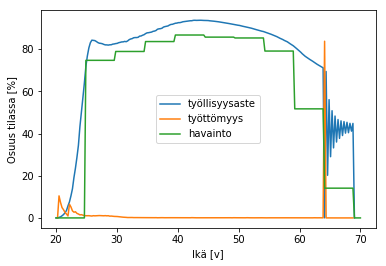

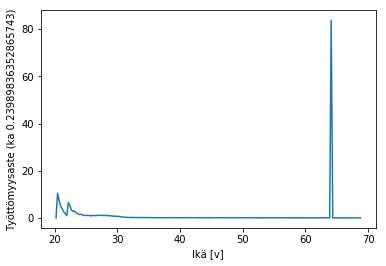

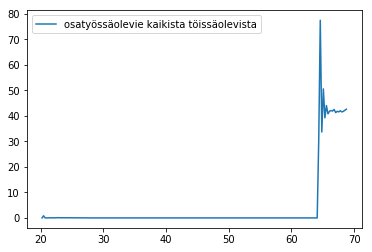

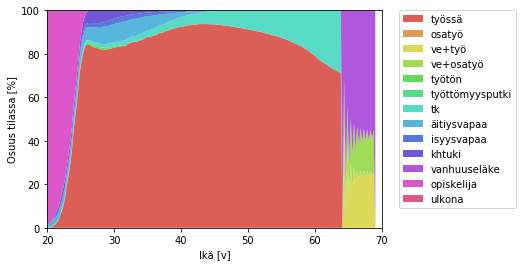

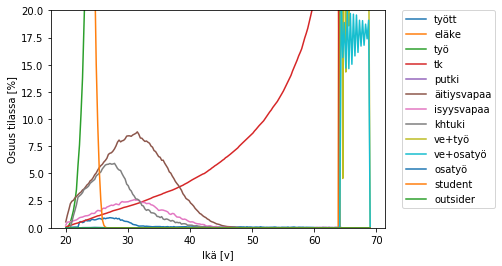

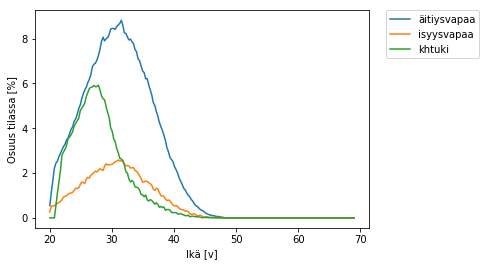

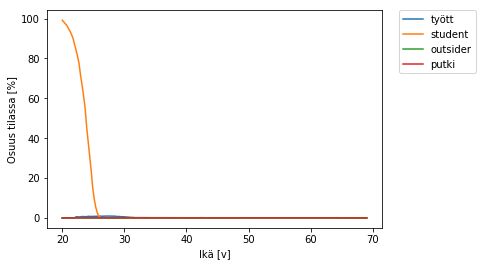

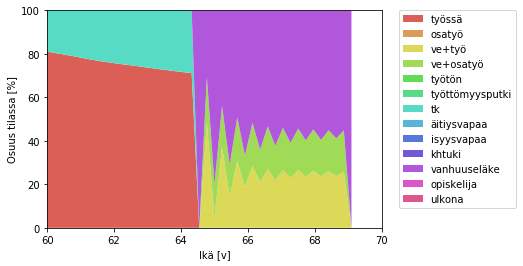

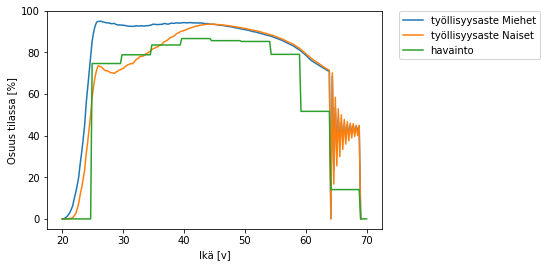

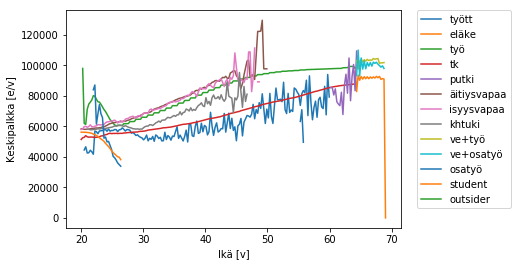

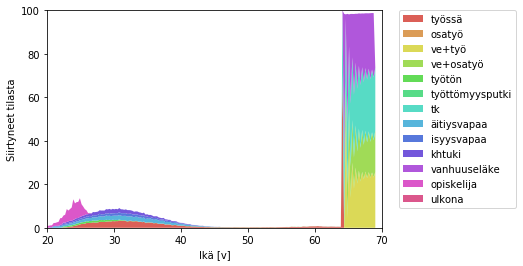

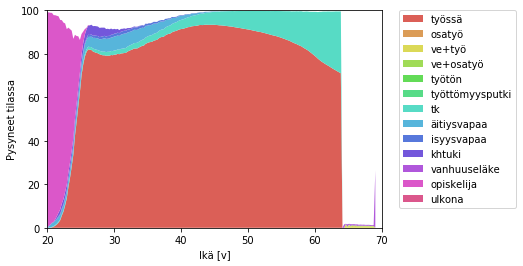

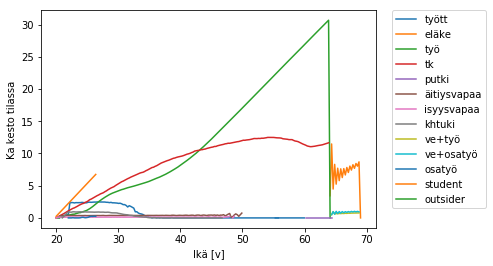

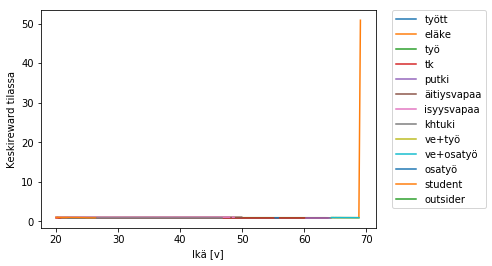

No handles with labels found to put in legend.


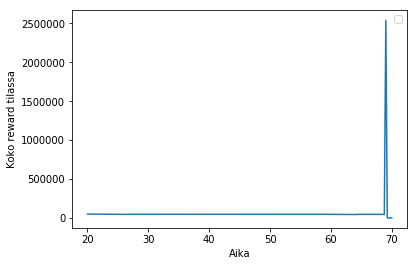

Yhteensä reward 237.60176341771435


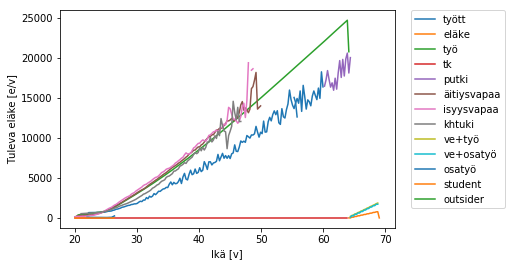

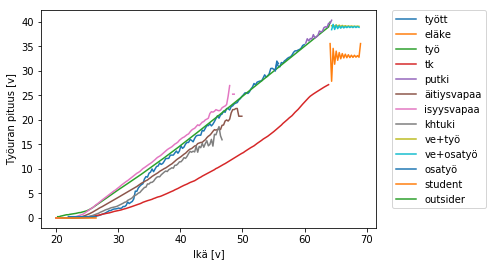

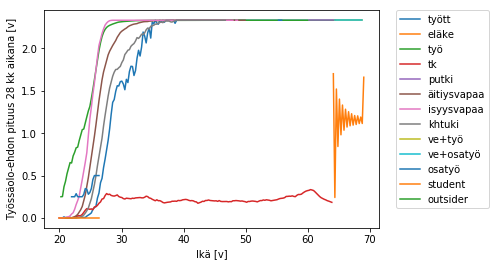

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              deterministic=deterministic,randomness=randomness)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save=perusmalli,
                plot=True,cont=True,start_from=perusmalli,results='results/perus_results2',
                callback_minsteps=callback_minsteps)
cc1.render(load='results/perus_results2')

In [4]:
#%tensorboard --logdir tmp/tenb

# Porrastettu työttömyysturva



No mortality included
train...
phase 1
batch 1 learning rate 0.25 scaled 0.25
training...
---------------------------------
| explained_variance | 0.947    |
| fps                | 1517     |
| nupdates           | 1        |
| policy_entropy     | 0.164    |
| policy_loss        | 0.0124   |
| total_timesteps    | 0        |
| value_loss         | 0.538    |
---------------------------------
---------------------------------
| explained_variance | 0.663    |
| fps                | 2583     |
| nupdates           | 10       |
| policy_entropy     | 0.157    |
| policy_loss        | -0.513   |
| total_timesteps    | 22149    |
| value_loss         | 4        |
---------------------------------
---------------------------------
| explained_variance | 0.311    |
| fps                | 2317     |
| nupdates           | 20       |
| policy_entropy     | 0.177    |
| policy_loss        | 1.79     |
| total_timesteps    | 46759    |
| value_loss         | 95.3     |
--------------------------

---------------------------------
| explained_variance | 0.966    |
| fps                | 2102     |
| nupdates           | 270      |
| policy_entropy     | 0.164    |
| policy_loss        | 0.00509  |
| total_timesteps    | 662009   |
| value_loss         | 0.324    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2101     |
| nupdates           | 280      |
| policy_entropy     | 0.0994   |
| policy_loss        | -0.0113  |
| total_timesteps    | 686619   |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.92     |
| fps                | 2101     |
| nupdates           | 290      |
| policy_entropy     | 0.152    |
| policy_loss        | -0.0054  |
| total_timesteps    | 711229   |
| value_loss         | 0.475    |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps         

---------------------------------
| explained_variance | 0.946    |
| fps                | 2100     |
| nupdates           | 540      |
| policy_entropy     | 0.188    |
| policy_loss        | -0.0142  |
| total_timesteps    | 1326479  |
| value_loss         | 0.465    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2100     |
| nupdates           | 550      |
| policy_entropy     | 0.145    |
| policy_loss        | 0.00183  |
| total_timesteps    | 1351089  |
| value_loss         | 0.408    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2100     |
| nupdates           | 560      |
| policy_entropy     | 0.133    |
| policy_loss        | -0.0045  |
| total_timesteps    | 1375699  |
| value_loss         | 0.319    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.931    |
| fps                | 2100     |
| nupdates           | 810      |
| policy_entropy     | 0.307    |
| policy_loss        | -0.00876 |
| total_timesteps    | 1990949  |
| value_loss         | 0.676    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2101     |
| nupdates           | 820      |
| policy_entropy     | 0.198    |
| policy_loss        | -0.00426 |
| total_timesteps    | 2015559  |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2101     |
| nupdates           | 830      |
| policy_entropy     | 0.14     |
| policy_loss        | -0.00628 |
| total_timesteps    | 2040169  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 2100     |
| nupdates           | 1080     |
| policy_entropy     | 0.406    |
| policy_loss        | -0.0187  |
| total_timesteps    | 2655419  |
| value_loss         | 0.573    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2100     |
| nupdates           | 1090     |
| policy_entropy     | 0.148    |
| policy_loss        | -0.0104  |
| total_timesteps    | 2680029  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2100     |
| nupdates           | 1100     |
| policy_entropy     | 0.197    |
| policy_loss        | -0.00327 |
| total_timesteps    | 2704639  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 2100     |
| nupdates           | 1350     |
| policy_entropy     | 0.186    |
| policy_loss        | -0.00667 |
| total_timesteps    | 3319889  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2100     |
| nupdates           | 1360     |
| policy_entropy     | 0.223    |
| policy_loss        | -0.0222  |
| total_timesteps    | 3344499  |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2100     |
| nupdates           | 1370     |
| policy_entropy     | 0.278    |
| policy_loss        | -0.00846 |
| total_timesteps    | 3369109  |
| value_loss         | 0.322    |
---------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 2101     |
| nupdates           | 1620     |
| policy_entropy     | 0.218    |
| policy_loss        | 0.000202 |
| total_timesteps    | 3984359  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2101     |
| nupdates           | 1630     |
| policy_entropy     | 0.182    |
| policy_loss        | 0.00573  |
| total_timesteps    | 4008969  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 2101     |
| nupdates           | 1640     |
| policy_entropy     | 0.396    |
| policy_loss        | 0.0018   |
| total_timesteps    | 4033579  |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2101     |
| nupdates           | 1890     |
| policy_entropy     | 0.212    |
| policy_loss        | -0.00751 |
| total_timesteps    | 4648829  |
| value_loss         | 0.214    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2101     |
| nupdates           | 1900     |
| policy_entropy     | 0.222    |
| policy_loss        | 0.00156  |
| total_timesteps    | 4673439  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 2101     |
| nupdates           | 1910     |
| policy_entropy     | 0.243    |
| policy_loss        | -0.00432 |
| total_timesteps    | 4698049  |
| value_loss         | 0.519    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

----------------------------------
| explained_variance | 0.982     |
| fps                | 2101      |
| nupdates           | 2160      |
| policy_entropy     | 0.161     |
| policy_loss        | -0.000959 |
| total_timesteps    | 5313299   |
| value_loss         | 0.234     |
----------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2101     |
| nupdates           | 2170     |
| policy_entropy     | 0.234    |
| policy_loss        | 0.0128   |
| total_timesteps    | 5337909  |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2101     |
| nupdates           | 2180     |
| policy_entropy     | 0.225    |
| policy_loss        | -0.00239 |
| total_timesteps    | 5362519  |
| value_loss         | 0.275    |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps

---------------------------------
| explained_variance | 0.968    |
| fps                | 2100     |
| nupdates           | 2430     |
| policy_entropy     | 0.158    |
| policy_loss        | 0.00343  |
| total_timesteps    | 5977769  |
| value_loss         | 0.331    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 2100     |
| nupdates           | 2440     |
| policy_entropy     | 0.22     |
| policy_loss        | 0.0016   |
| total_timesteps    | 6002379  |
| value_loss         | 0.517    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2100     |
| nupdates           | 2450     |
| policy_entropy     | 0.252    |
| policy_loss        | 0.0143   |
| total_timesteps    | 6026989  |
| value_loss         | 0.486    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2099     |
| nupdates           | 2700     |
| policy_entropy     | 0.174    |
| policy_loss        | 0.00261  |
| total_timesteps    | 6642239  |
| value_loss         | 0.26     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2099     |
| nupdates           | 2710     |
| policy_entropy     | 0.271    |
| policy_loss        | -0.00542 |
| total_timesteps    | 6666849  |
| value_loss         | 0.473    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2098     |
| nupdates           | 2720     |
| policy_entropy     | 0.162    |
| policy_loss        | 0.00628  |
| total_timesteps    | 6691459  |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2096     |
| nupdates           | 2970     |
| policy_entropy     | 0.271    |
| policy_loss        | -0.00392 |
| total_timesteps    | 7306709  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2096     |
| nupdates           | 2980     |
| policy_entropy     | 0.23     |
| policy_loss        | -0.00106 |
| total_timesteps    | 7331319  |
| value_loss         | 0.542    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2096     |
| nupdates           | 2990     |
| policy_entropy     | 0.224    |
| policy_loss        | 0.00154  |
| total_timesteps    | 7355929  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 2093     |
| nupdates           | 3240     |
| policy_entropy     | 0.331    |
| policy_loss        | 0.0133   |
| total_timesteps    | 7971179  |
| value_loss         | 0.416    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2092     |
| nupdates           | 3250     |
| policy_entropy     | 0.226    |
| policy_loss        | -0.00155 |
| total_timesteps    | 7995789  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2092     |
| nupdates           | 3260     |
| policy_entropy     | 0.376    |
| policy_loss        | 0.00147  |
| total_timesteps    | 8020399  |
| value_loss         | 0.421    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2087     |
| nupdates           | 3510     |
| policy_entropy     | 0.151    |
| policy_loss        | -0.00265 |
| total_timesteps    | 8635649  |
| value_loss         | 0.264    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2087     |
| nupdates           | 3520     |
| policy_entropy     | 0.235    |
| policy_loss        | -0.0074  |
| total_timesteps    | 8660259  |
| value_loss         | 0.468    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2086     |
| nupdates           | 3530     |
| policy_entropy     | 0.149    |
| policy_loss        | -0.00129 |
| total_timesteps    | 8684869  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2079     |
| nupdates           | 3780     |
| policy_entropy     | 0.146    |
| policy_loss        | 0.000739 |
| total_timesteps    | 9300119  |
| value_loss         | 0.29     |
---------------------------------
----------------------------------
| explained_variance | 0.973     |
| fps                | 2079      |
| nupdates           | 3790      |
| policy_entropy     | 0.196     |
| policy_loss        | -0.000237 |
| total_timesteps    | 9324729   |
| value_loss         | 0.277     |
----------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2078     |
| nupdates           | 3800     |
| policy_entropy     | 0.243    |
| policy_loss        | -0.00349 |
| total_timesteps    | 9349339  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps

---------------------------------
| explained_variance | 0.962    |
| fps                | 2068     |
| nupdates           | 4050     |
| policy_entropy     | 0.201    |
| policy_loss        | -0.00292 |
| total_timesteps    | 9964589  |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2067     |
| nupdates           | 4060     |
| policy_entropy     | 0.295    |
| policy_loss        | -0.00281 |
| total_timesteps    | 9989199  |
| value_loss         | 0.375    |
---------------------------------
done
phase 2
init vecmonitor:  tmp/monitor.csv
batch 8 learning rate 0.25 scaled 0.7071067811865476
training...
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.42885 |
| explained_variance | 0.95      |
| fps                | 2625      |
| nupdates           | 1         |
| policy_entropy     | 0.236     |
| policy_loss        | -0.00258

332856 timesteps 1656 episodes
Best mean reward: 239.27 - Last mean reward per episode: 238.48
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.84406 |
| explained_variance | 0.346     |
| fps                | 2810      |
| nupdates           | 17        |
| policy_entropy     | 0.131     |
| policy_loss        | -0.761    |
| total_timesteps    | 314896    |
| value_loss         | 35.7      |
----------------------------------
352152 timesteps 1752 episodes
Best mean reward: 239.27 - Last mean reward per episode: 237.13
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.16304 |
| explained_variance | 0.341     |
| fps                | 2808      |
| nupdates           | 18        |
| policy_entropy     | 0.123     |
| policy_loss        | -0.697    |
| total_timesteps    | 334577    |
| value_loss         | 34.4      |
----------------------------------
373860 timesteps 1860 episodes
Best mean

687420 timesteps 3420 episodes
Best mean reward: 239.76 - Last mean reward per episode: 236.61
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.43074 |
| explained_variance | 0.674     |
| fps                | 2799      |
| nupdates           | 35        |
| policy_entropy     | 0.117     |
| policy_loss        | 0.103     |
| total_timesteps    | 669154    |
| value_loss         | 3.39      |
----------------------------------
706716 timesteps 3516 episodes
Best mean reward: 239.76 - Last mean reward per episode: 237.03
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.10493 |
| explained_variance | 0.708     |
| fps                | 2799      |
| nupdates           | 36        |
| policy_entropy     | 0.115     |
| policy_loss        | 0.12      |
| total_timesteps    | 688835    |
| value_loss         | 3.62      |
----------------------------------
726012 timesteps 3612 episodes
Best mean

1041984 timesteps 5184 episodes
Best mean reward: 239.83 - Last mean reward per episode: 237.59
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.48708 |
| explained_variance | 0.859     |
| fps                | 2795      |
| nupdates           | 53        |
| policy_entropy     | 0.0856    |
| policy_loss        | -0.0371   |
| total_timesteps    | 1023412   |
| value_loss         | 1.44      |
----------------------------------
1061280 timesteps 5280 episodes
Best mean reward: 239.83 - Last mean reward per episode: 238.47
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.43163 |
| explained_variance | 0.868     |
| fps                | 2795      |
| nupdates           | 54        |
| policy_entropy     | 0.101     |
| policy_loss        | -0.0728   |
| total_timesteps    | 1043093   |
| value_loss         | 1.5       |
----------------------------------
1080576 timesteps 5376 episodes
Best m

1396548 timesteps 6948 episodes
Best mean reward: 239.83 - Last mean reward per episode: 235.74
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 234.95908 |
| explained_variance | 0.926     |
| fps                | 2794      |
| nupdates           | 71        |
| policy_entropy     | 0.09      |
| policy_loss        | 0.0158    |
| total_timesteps    | 1377670   |
| value_loss         | 0.728     |
----------------------------------
1415844 timesteps 7044 episodes
Best mean reward: 239.83 - Last mean reward per episode: 236.98
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 236.4882 |
| explained_variance | 0.92     |
| fps                | 2795     |
| nupdates           | 72       |
| policy_entropy     | 0.102    |
| policy_loss        | 0.0139   |
| total_timesteps    | 1397351  |
| value_loss         | 0.942    |
---------------------------------
1435140 timesteps 7140 episodes
Best mean reward:

1751112 timesteps 8712 episodes
Best mean reward: 239.83 - Last mean reward per episode: 236.34
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.33873 |
| explained_variance | 0.945     |
| fps                | 2793      |
| nupdates           | 89        |
| policy_entropy     | 0.126     |
| policy_loss        | -0.00431  |
| total_timesteps    | 1731928   |
| value_loss         | 0.892     |
----------------------------------
1770408 timesteps 8808 episodes
Best mean reward: 239.83 - Last mean reward per episode: 236.95
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.97296 |
| explained_variance | 0.947     |
| fps                | 2793      |
| nupdates           | 90        |
| policy_entropy     | 0.117     |
| policy_loss        | 0.00664   |
| total_timesteps    | 1751609   |
| value_loss         | 0.789     |
----------------------------------
1789704 timesteps 8904 episodes
Best m

2105676 timesteps 10476 episodes
Best mean reward: 239.83 - Last mean reward per episode: 235.47
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.51094 |
| explained_variance | 0.956     |
| fps                | 2792      |
| nupdates           | 107       |
| policy_entropy     | 0.129     |
| policy_loss        | -0.0115   |
| total_timesteps    | 2086186   |
| value_loss         | 0.539     |
----------------------------------
2124972 timesteps 10572 episodes
Best mean reward: 239.83 - Last mean reward per episode: 237.21
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.97774 |
| explained_variance | 0.956     |
| fps                | 2792      |
| nupdates           | 108       |
| policy_entropy     | 0.119     |
| policy_loss        | -0.00839  |
| total_timesteps    | 2105867   |
| value_loss         | 0.476     |
----------------------------------
2144268 timesteps 10668 episodes
Bes

2457828 timesteps 12228 episodes
Best mean reward: 239.83 - Last mean reward per episode: 236.87
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.44113 |
| explained_variance | 0.963     |
| fps                | 2792      |
| nupdates           | 125       |
| policy_entropy     | 0.168     |
| policy_loss        | -0.0142   |
| total_timesteps    | 2440444   |
| value_loss         | 0.451     |
----------------------------------
2479536 timesteps 12336 episodes
Best mean reward: 239.83 - Last mean reward per episode: 239.36
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 239.40355 |
| explained_variance | 0.959     |
| fps                | 2791      |
| nupdates           | 126       |
| policy_entropy     | 0.147     |
| policy_loss        | 0.00145   |
| total_timesteps    | 2460125   |
| value_loss         | 0.444     |
----------------------------------
2498832 timesteps 12432 episodes
Bes

2812392 timesteps 13992 episodes
Best mean reward: 239.83 - Last mean reward per episode: 237.64
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.92064 |
| explained_variance | 0.962     |
| fps                | 2791      |
| nupdates           | 143       |
| policy_entropy     | 0.161     |
| policy_loss        | 0.00398   |
| total_timesteps    | 2794702   |
| value_loss         | 0.437     |
----------------------------------
2831688 timesteps 14088 episodes
Best mean reward: 239.83 - Last mean reward per episode: 236.54
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.36137 |
| explained_variance | 0.957     |
| fps                | 2791      |
| nupdates           | 144       |
| policy_entropy     | 0.174     |
| policy_loss        | 0.00479   |
| total_timesteps    | 2814383   |
| value_loss         | 0.457     |
----------------------------------
2853396 timesteps 14196 episodes
Bes

3147660 timesteps 15660 episodes
Best mean reward: 239.83 - Last mean reward per episode: 237.23
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.46515 |
| explained_variance | 0.958     |
| fps                | 2791      |
| nupdates           | 160       |
| policy_entropy     | 0.159     |
| policy_loss        | -0.0013   |
| total_timesteps    | 3129279   |
| value_loss         | 0.432     |
----------------------------------
3166956 timesteps 15756 episodes
Best mean reward: 239.83 - Last mean reward per episode: 239.07
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 239.19022 |
| explained_variance | 0.97      |
| fps                | 2791      |
| nupdates           | 161       |
| policy_entropy     | 0.154     |
| policy_loss        | -0.00115  |
| total_timesteps    | 3148960   |
| value_loss         | 0.373     |
----------------------------------
3186252 timesteps 15852 episodes
Bes

3502224 timesteps 17424 episodes
Best mean reward: 239.83 - Last mean reward per episode: 239.02
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.46155 |
| explained_variance | 0.961     |
| fps                | 2790      |
| nupdates           | 178       |
| policy_entropy     | 0.179     |
| policy_loss        | -0.000572 |
| total_timesteps    | 3483537   |
| value_loss         | 0.458     |
----------------------------------
3521520 timesteps 17520 episodes
Best mean reward: 239.83 - Last mean reward per episode: 237.14
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.53796 |
| explained_variance | 0.957     |
| fps                | 2790      |
| nupdates           | 179       |
| policy_entropy     | 0.192     |
| policy_loss        | 0.00189   |
| total_timesteps    | 3503218   |
| value_loss         | 0.502     |
----------------------------------
3540816 timesteps 17616 episodes
Bes

3837492 timesteps 19092 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.34
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.13121 |
| explained_variance | 0.968     |
| fps                | 2790      |
| nupdates           | 195       |
| policy_entropy     | 0.207     |
| policy_loss        | -0.00474  |
| total_timesteps    | 3818114   |
| value_loss         | 0.39      |
----------------------------------
3856788 timesteps 19188 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.26
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.16978 |
| explained_variance | 0.965     |
| fps                | 2790      |
| nupdates           | 196       |
| policy_entropy     | 0.166     |
| policy_loss        | -0.00357  |
| total_timesteps    | 3837795   |
| value_loss         | 0.355     |
----------------------------------
3876084 timesteps 19284 episodes
Bes

4189644 timesteps 20844 episodes
Best mean reward: 240.27 - Last mean reward per episode: 235.86
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.63033 |
| explained_variance | 0.96      |
| fps                | 2790      |
| nupdates           | 213       |
| policy_entropy     | 0.227     |
| policy_loss        | -0.00636  |
| total_timesteps    | 4172372   |
| value_loss         | 0.414     |
----------------------------------
4211352 timesteps 20952 episodes
Best mean reward: 240.27 - Last mean reward per episode: 239.46
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 239.23384 |
| explained_variance | 0.963     |
| fps                | 2790      |
| nupdates           | 214       |
| policy_entropy     | 0.209     |
| policy_loss        | -0.00209  |
| total_timesteps    | 4192053   |
| value_loss         | 0.429     |
----------------------------------
4230648 timesteps 21048 episodes
Bes

4544208 timesteps 22608 episodes
Best mean reward: 240.27 - Last mean reward per episode: 235.48
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.52135 |
| explained_variance | 0.962     |
| fps                | 2789      |
| nupdates           | 231       |
| policy_entropy     | 0.264     |
| policy_loss        | -0.00801  |
| total_timesteps    | 4526630   |
| value_loss         | 0.474     |
----------------------------------
4563504 timesteps 22704 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.84
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.63893 |
| explained_variance | 0.954     |
| fps                | 2789      |
| nupdates           | 232       |
| policy_entropy     | 0.21      |
| policy_loss        | -0.0037   |
| total_timesteps    | 4546311   |
| value_loss         | 0.477     |
----------------------------------
4585212 timesteps 22812 episodes
Bes

4898772 timesteps 24372 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.25
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.43452 |
| explained_variance | 0.958     |
| fps                | 2789      |
| nupdates           | 249       |
| policy_entropy     | 0.241     |
| policy_loss        | -0.00338  |
| total_timesteps    | 4880888   |
| value_loss         | 0.462     |
----------------------------------
4918068 timesteps 24468 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.98
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 236.8896 |
| explained_variance | 0.963    |
| fps                | 2789     |
| nupdates           | 250      |
| policy_entropy     | 0.229    |
| policy_loss        | -0.00263 |
| total_timesteps    | 4900569  |
| value_loss         | 0.419    |
---------------------------------
4937364 timesteps 24564 episodes
Best mean rewa

5253336 timesteps 26136 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.20
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.24066 |
| explained_variance | 0.96      |
| fps                | 2789      |
| nupdates           | 267       |
| policy_entropy     | 0.26      |
| policy_loss        | -0.00634  |
| total_timesteps    | 5235146   |
| value_loss         | 0.443     |
----------------------------------
5272632 timesteps 26232 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.50
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.59624 |
| explained_variance | 0.967     |
| fps                | 2789      |
| nupdates           | 268       |
| policy_entropy     | 0.198     |
| policy_loss        | -0.00256  |
| total_timesteps    | 5254827   |
| value_loss         | 0.371     |
----------------------------------
5291928 timesteps 26328 episodes
Bes

5607900 timesteps 27900 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.16
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.05847 |
| explained_variance | 0.975     |
| fps                | 2789      |
| nupdates           | 285       |
| policy_entropy     | 0.174     |
| policy_loss        | -0.00371  |
| total_timesteps    | 5589404   |
| value_loss         | 0.312     |
----------------------------------
5627196 timesteps 27996 episodes
Best mean reward: 240.27 - Last mean reward per episode: 238.86
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.84726 |
| explained_variance | 0.965     |
| fps                | 2789      |
| nupdates           | 286       |
| policy_entropy     | 0.192     |
| policy_loss        | -0.00211  |
| total_timesteps    | 5609085   |
| value_loss         | 0.377     |
----------------------------------
5646492 timesteps 28092 episodes
Bes

5962464 timesteps 29664 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.09
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.92639 |
| explained_variance | 0.959     |
| fps                | 2788      |
| nupdates           | 303       |
| policy_entropy     | 0.217     |
| policy_loss        | -0.00645  |
| total_timesteps    | 5943662   |
| value_loss         | 0.422     |
----------------------------------
5981760 timesteps 29760 episodes
Best mean reward: 240.27 - Last mean reward per episode: 235.44
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.69278 |
| explained_variance | 0.967     |
| fps                | 2788      |
| nupdates           | 304       |
| policy_entropy     | 0.24      |
| policy_loss        | -0.00383  |
| total_timesteps    | 5963343   |
| value_loss         | 0.378     |
----------------------------------
6001056 timesteps 29856 episodes
Bes

6295320 timesteps 31320 episodes
Best mean reward: 240.27 - Last mean reward per episode: 234.93
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 234.93364 |
| explained_variance | 0.951     |
| fps                | 2788      |
| nupdates           | 320       |
| policy_entropy     | 0.282     |
| policy_loss        | 0.00287   |
| total_timesteps    | 6278239   |
| value_loss         | 0.5       |
----------------------------------
6317028 timesteps 31428 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.22
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.35373 |
| explained_variance | 0.967     |
| fps                | 2788      |
| nupdates           | 321       |
| policy_entropy     | 0.219     |
| policy_loss        | 0.00202   |
| total_timesteps    | 6297920   |
| value_loss         | 0.388     |
----------------------------------
6336324 timesteps 31524 episodes
Bes

6649884 timesteps 33084 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.01
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.75877 |
| explained_variance | 0.962     |
| fps                | 2788      |
| nupdates           | 338       |
| policy_entropy     | 0.225     |
| policy_loss        | -0.00467  |
| total_timesteps    | 6632497   |
| value_loss         | 0.429     |
----------------------------------
6669180 timesteps 33180 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.44
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.55885 |
| explained_variance | 0.965     |
| fps                | 2788      |
| nupdates           | 339       |
| policy_entropy     | 0.224     |
| policy_loss        | -0.00371  |
| total_timesteps    | 6652178   |
| value_loss         | 0.398     |
----------------------------------
6690888 timesteps 33288 episodes
Bes

7004448 timesteps 34848 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.84
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.70207 |
| explained_variance | 0.965     |
| fps                | 2788      |
| nupdates           | 356       |
| policy_entropy     | 0.204     |
| policy_loss        | -0.00464  |
| total_timesteps    | 6986755   |
| value_loss         | 0.366     |
----------------------------------
7023744 timesteps 34944 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.99
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.15794 |
| explained_variance | 0.958     |
| fps                | 2788      |
| nupdates           | 357       |
| policy_entropy     | 0.212     |
| policy_loss        | -0.0032   |
| total_timesteps    | 7006436   |
| value_loss         | 0.467     |
----------------------------------
7043040 timesteps 35040 episodes
Bes

7359012 timesteps 36612 episodes
Best mean reward: 240.27 - Last mean reward per episode: 238.07
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 237.8349 |
| explained_variance | 0.97     |
| fps                | 2787     |
| nupdates           | 374      |
| policy_entropy     | 0.195    |
| policy_loss        | 0.000312 |
| total_timesteps    | 7341013  |
| value_loss         | 0.373    |
---------------------------------
7378308 timesteps 36708 episodes
Best mean reward: 240.27 - Last mean reward per episode: 238.68
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.54597 |
| explained_variance | 0.971     |
| fps                | 2787      |
| nupdates           | 375       |
| policy_entropy     | 0.217     |
| policy_loss        | -0.00232  |
| total_timesteps    | 7360694   |
| value_loss         | 0.364     |
----------------------------------
7397604 timesteps 36804 episodes
Best mean rewa

7713576 timesteps 38376 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.03
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.29889 |
| explained_variance | 0.962     |
| fps                | 2787      |
| nupdates           | 392       |
| policy_entropy     | 0.21      |
| policy_loss        | -0.00795  |
| total_timesteps    | 7695271   |
| value_loss         | 0.401     |
----------------------------------
7732872 timesteps 38472 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.38
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.42924 |
| explained_variance | 0.96      |
| fps                | 2787      |
| nupdates           | 393       |
| policy_entropy     | 0.197     |
| policy_loss        | -0.0052   |
| total_timesteps    | 7714952   |
| value_loss         | 0.378     |
----------------------------------
7752168 timesteps 38568 episodes
Bes

8048844 timesteps 40044 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.79
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.26909 |
| explained_variance | 0.957     |
| fps                | 2787      |
| nupdates           | 409       |
| policy_entropy     | 0.205     |
| policy_loss        | -0.00198  |
| total_timesteps    | 8029848   |
| value_loss         | 0.452     |
----------------------------------
8068140 timesteps 40140 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.57
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.50525 |
| explained_variance | 0.966     |
| fps                | 2787      |
| nupdates           | 410       |
| policy_entropy     | 0.227     |
| policy_loss        | -0.000481 |
| total_timesteps    | 8049529   |
| value_loss         | 0.452     |
----------------------------------
8087436 timesteps 40236 episodes
Bes

8400996 timesteps 41796 episodes
Best mean reward: 240.27 - Last mean reward per episode: 235.85
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.76862 |
| explained_variance | 0.967     |
| fps                | 2787      |
| nupdates           | 427       |
| policy_entropy     | 0.255     |
| policy_loss        | -0.000792 |
| total_timesteps    | 8384106   |
| value_loss         | 0.384     |
----------------------------------
8422704 timesteps 41904 episodes
Best mean reward: 240.27 - Last mean reward per episode: 235.63
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.49203 |
| explained_variance | 0.956     |
| fps                | 2787      |
| nupdates           | 428       |
| policy_entropy     | 0.218     |
| policy_loss        | -0.00327  |
| total_timesteps    | 8403787   |
| value_loss         | 0.449     |
----------------------------------
8442000 timesteps 42000 episodes
Bes

8755560 timesteps 43560 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.54
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.36789 |
| explained_variance | 0.958     |
| fps                | 2786      |
| nupdates           | 445       |
| policy_entropy     | 0.21      |
| policy_loss        | -0.00272  |
| total_timesteps    | 8738364   |
| value_loss         | 0.383     |
----------------------------------
8777268 timesteps 43668 episodes
Best mean reward: 240.27 - Last mean reward per episode: 239.05
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.93024 |
| explained_variance | 0.966     |
| fps                | 2786      |
| nupdates           | 446       |
| policy_entropy     | 0.171     |
| policy_loss        | -0.00277  |
| total_timesteps    | 8758045   |
| value_loss         | 0.351     |
----------------------------------
8796564 timesteps 43764 episodes
Bes

9110124 timesteps 45324 episodes
Best mean reward: 240.27 - Last mean reward per episode: 237.94
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.25427 |
| explained_variance | 0.958     |
| fps                | 2786      |
| nupdates           | 463       |
| policy_entropy     | 0.214     |
| policy_loss        | -0.00377  |
| total_timesteps    | 9092622   |
| value_loss         | 0.437     |
----------------------------------
9129420 timesteps 45420 episodes
Best mean reward: 240.27 - Last mean reward per episode: 236.35
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.79388 |
| explained_variance | 0.956     |
| fps                | 2786      |
| nupdates           | 464       |
| policy_entropy     | 0.208     |
| policy_loss        | -0.00255  |
| total_timesteps    | 9112303   |
| value_loss         | 0.422     |
----------------------------------
9151128 timesteps 45528 episodes
Bes

9464688 timesteps 47088 episodes
Best mean reward: 240.27 - Last mean reward per episode: 235.59
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.49002 |
| explained_variance | 0.953     |
| fps                | 2786      |
| nupdates           | 481       |
| policy_entropy     | 0.223     |
| policy_loss        | -0.000804 |
| total_timesteps    | 9446880   |
| value_loss         | 0.477     |
----------------------------------
9483984 timesteps 47184 episodes
Best mean reward: 240.27 - Last mean reward per episode: 234.82
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 234.61984 |
| explained_variance | 0.967     |
| fps                | 2786      |
| nupdates           | 482       |
| policy_entropy     | 0.255     |
| policy_loss        | -0.00325  |
| total_timesteps    | 9466561   |
| value_loss         | 0.389     |
----------------------------------
9503280 timesteps 47280 episodes
NEW

9799956 timesteps 48756 episodes
Best mean reward: 240.37 - Last mean reward per episode: 237.56
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.18079 |
| explained_variance | 0.963     |
| fps                | 2786      |
| nupdates           | 498       |
| policy_entropy     | 0.177     |
| policy_loss        | -0.00252  |
| total_timesteps    | 9781457   |
| value_loss         | 0.348     |
----------------------------------
9819252 timesteps 48852 episodes
Best mean reward: 240.37 - Last mean reward per episode: 237.04
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 237.1066 |
| explained_variance | 0.957    |
| fps                | 2786     |
| nupdates           | 499      |
| policy_entropy     | 0.212    |
| policy_loss        | -0.00265 |
| total_timesteps    | 9801138  |
| value_loss         | 0.439    |
---------------------------------
9838548 timesteps 48948 episodes
Best mean rewa

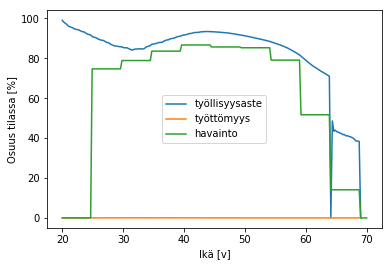

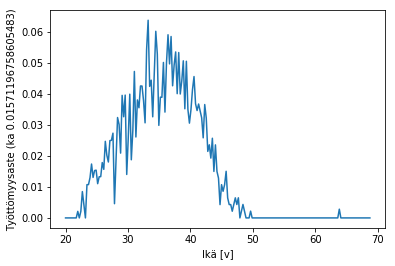

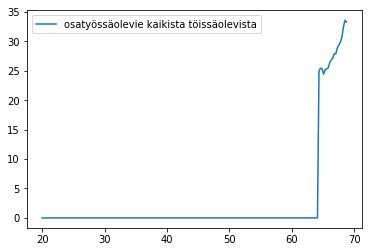

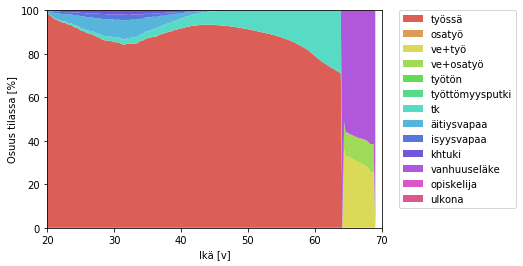

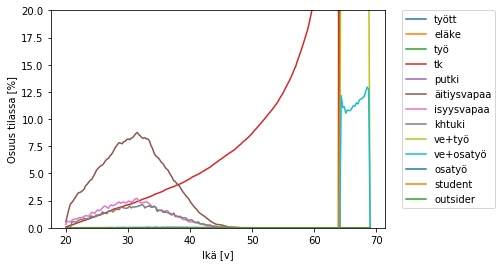

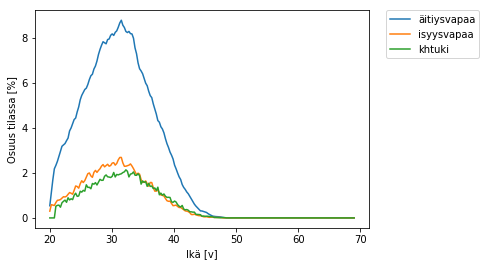

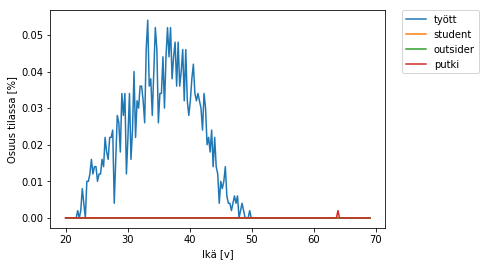

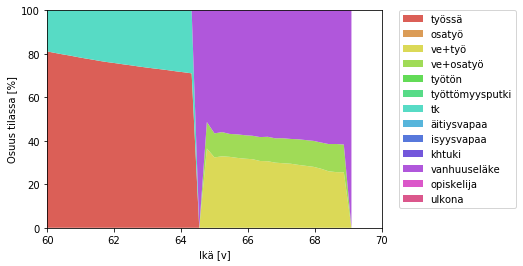

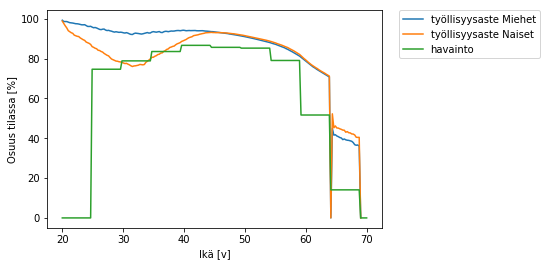

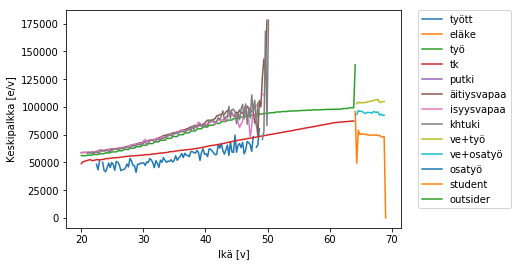

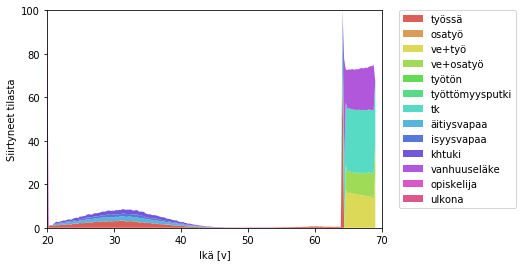

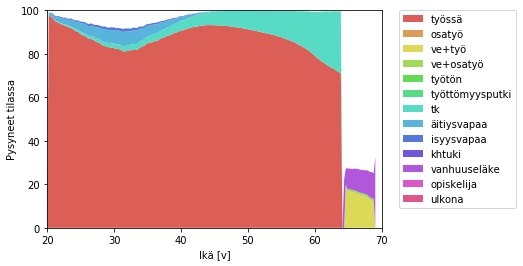

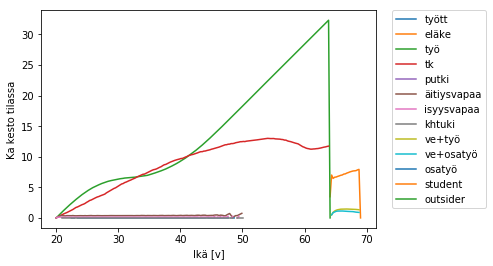

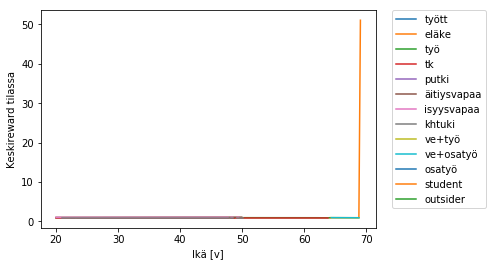

No handles with labels found to put in legend.


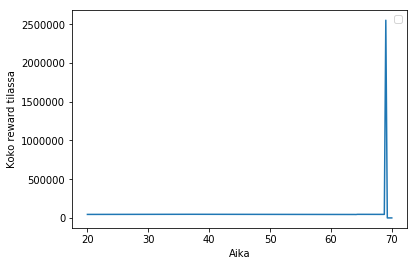

Yhteensä reward 237.02835077341192


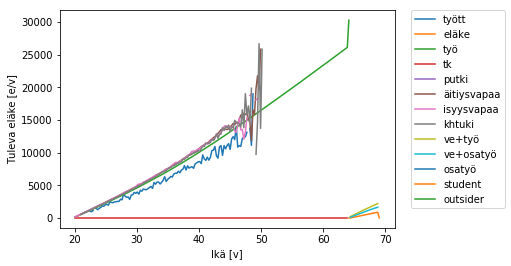

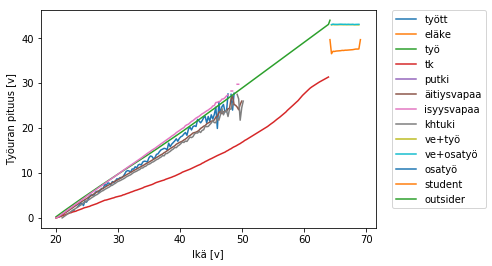

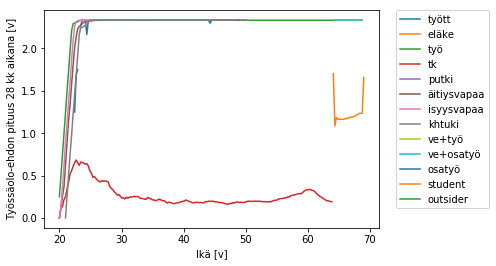

In [5]:
cc2_porras=Lifecycle(env='unemploymentSteps-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2_porras.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_steps',plot=True,
                results='results/steps_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc2_porras.render(load='results/steps_results')


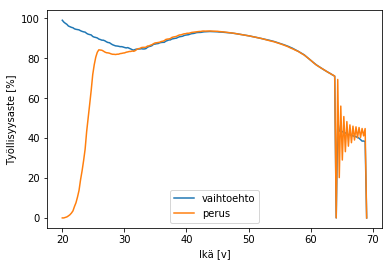

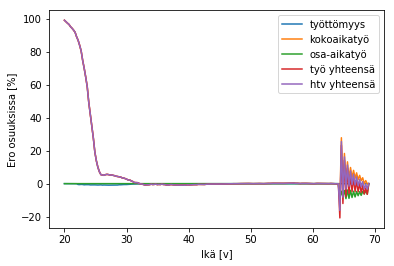

Työllisyysvaikutus 30-63-vuotiaisiin noin -1826.0 htv ja -1828.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -0.2479541745960656 prosenttia
Epävarmuus työllisyysasteissa 0.008765386471799176, hajonta 0.045880776270071845


In [6]:
cc2_porras.compare_with(cc1)

# Työttömyysputken poisto

Työttömyysputki on suosittu elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
train...
phase 1
batch 1 learning rate 0.25 scaled 0.25
training...
---------------------------------
| explained_variance | 0.958    |
| fps                | 1418     |
| nupdates           | 1        |
| policy_entropy     | 0.24     |
| policy_loss        | -0.00959 |
| total_timesteps    | 0        |
| value_loss         | 0.359    |
---------------------------------
---------------------------------
| explained_variance | 0.836    |
| fps                | 2515     |
| nupdates           | 10       |
| policy_entropy     | 0.107    |
| policy_loss        | -0.0658  |
| total_timesteps    | 22149    |
| value_loss         | 2.87     |
---------------------------------
---------------------------------
| explained_variance | 0.691    |
| fps                | 2289     |
| nupdates           | 20       |
| policy_entropy     | 0.121    |
| policy_loss        | -0.194   |
| total_timesteps    | 46759    |
| value_loss         | 13.2     |
--------------------------

---------------------------------
| explained_variance | 0.983    |
| fps                | 2108     |
| nupdates           | 270      |
| policy_entropy     | 0.158    |
| policy_loss        | 0.00187  |
| total_timesteps    | 662009   |
| value_loss         | 0.232    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2108     |
| nupdates           | 280      |
| policy_entropy     | 0.157    |
| policy_loss        | 0.000616 |
| total_timesteps    | 686619   |
| value_loss         | 0.293    |
---------------------------------
----------------------------------
| explained_variance | 0.98      |
| fps                | 2109      |
| nupdates           | 290       |
| policy_entropy     | 0.123     |
| policy_loss        | -3.57e-06 |
| total_timesteps    | 711229    |
| value_loss         | 0.268     |
----------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps

---------------------------------
| explained_variance | 0.94     |
| fps                | 2108     |
| nupdates           | 540      |
| policy_entropy     | 0.261    |
| policy_loss        | 0.00339  |
| total_timesteps    | 1326479  |
| value_loss         | 0.481    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2108     |
| nupdates           | 550      |
| policy_entropy     | 0.3      |
| policy_loss        | 0.00152  |
| total_timesteps    | 1351089  |
| value_loss         | 0.568    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 2108     |
| nupdates           | 560      |
| policy_entropy     | 0.218    |
| policy_loss        | -0.00102 |
| total_timesteps    | 1375699  |
| value_loss         | 0.617    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2109     |
| nupdates           | 810      |
| policy_entropy     | 0.134    |
| policy_loss        | 0.00181  |
| total_timesteps    | 1990949  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2109     |
| nupdates           | 820      |
| policy_entropy     | 0.273    |
| policy_loss        | -0.00983 |
| total_timesteps    | 2015559  |
| value_loss         | 0.349    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2109     |
| nupdates           | 830      |
| policy_entropy     | 0.252    |
| policy_loss        | -0.0112  |
| total_timesteps    | 2040169  |
| value_loss         | 0.187    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2109     |
| nupdates           | 1080     |
| policy_entropy     | 0.256    |
| policy_loss        | 0.00393  |
| total_timesteps    | 2655419  |
| value_loss         | 0.339    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2109     |
| nupdates           | 1090     |
| policy_entropy     | 0.205    |
| policy_loss        | -0.00974 |
| total_timesteps    | 2680029  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2109     |
| nupdates           | 1100     |
| policy_entropy     | 0.185    |
| policy_loss        | -0.00271 |
| total_timesteps    | 2704639  |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.948    |
| fps                | 2109     |
| nupdates           | 1350     |
| policy_entropy     | 0.2      |
| policy_loss        | 3.81e-05 |
| total_timesteps    | 3319889  |
| value_loss         | 0.506    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2109     |
| nupdates           | 1360     |
| policy_entropy     | 0.181    |
| policy_loss        | 0.0052   |
| total_timesteps    | 3344499  |
| value_loss         | 0.368    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2109     |
| nupdates           | 1370     |
| policy_entropy     | 0.329    |
| policy_loss        | -0.00998 |
| total_timesteps    | 3369109  |
| value_loss         | 0.385    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2110     |
| nupdates           | 1620     |
| policy_entropy     | 0.193    |
| policy_loss        | 0.00645  |
| total_timesteps    | 3984359  |
| value_loss         | 0.34     |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2110     |
| nupdates           | 1630     |
| policy_entropy     | 0.211    |
| policy_loss        | -0.0095  |
| total_timesteps    | 4008969  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps                | 2110     |
| nupdates           | 1640     |
| policy_entropy     | 0.216    |
| policy_loss        | -0.00449 |
| total_timesteps    | 4033579  |
| value_loss         | 0.59     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2110     |
| nupdates           | 1890     |
| policy_entropy     | 0.144    |
| policy_loss        | -0.00121 |
| total_timesteps    | 4648829  |
| value_loss         | 0.171    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2110     |
| nupdates           | 1900     |
| policy_entropy     | 0.193    |
| policy_loss        | 0.00122  |
| total_timesteps    | 4673439  |
| value_loss         | 0.448    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2110     |
| nupdates           | 1910     |
| policy_entropy     | 0.38     |
| policy_loss        | 0.00208  |
| total_timesteps    | 4698049  |
| value_loss         | 0.452    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 2110     |
| nupdates           | 2160     |
| policy_entropy     | 0.264    |
| policy_loss        | 0.00326  |
| total_timesteps    | 5313299  |
| value_loss         | 0.485    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2110     |
| nupdates           | 2170     |
| policy_entropy     | 0.475    |
| policy_loss        | -0.00838 |
| total_timesteps    | 5337909  |
| value_loss         | 0.492    |
---------------------------------
----------------------------------
| explained_variance | 0.975     |
| fps                | 2110      |
| nupdates           | 2180      |
| policy_entropy     | 0.129     |
| policy_loss        | -8.99e-05 |
| total_timesteps    | 5362519   |
| value_loss         | 0.214     |
----------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps

---------------------------------
| explained_variance | 0.982    |
| fps                | 2110     |
| nupdates           | 2430     |
| policy_entropy     | 0.185    |
| policy_loss        | 0.000817 |
| total_timesteps    | 5977769  |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 2110     |
| nupdates           | 2440     |
| policy_entropy     | 0.165    |
| policy_loss        | -0.00202 |
| total_timesteps    | 6002379  |
| value_loss         | 0.516    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2110     |
| nupdates           | 2450     |
| policy_entropy     | 0.214    |
| policy_loss        | -0.00413 |
| total_timesteps    | 6026989  |
| value_loss         | 0.405    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.953    |
| fps                | 2109     |
| nupdates           | 2700     |
| policy_entropy     | 0.25     |
| policy_loss        | -0.00553 |
| total_timesteps    | 6642239  |
| value_loss         | 0.505    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2109     |
| nupdates           | 2710     |
| policy_entropy     | 0.175    |
| policy_loss        | -0.0102  |
| total_timesteps    | 6666849  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2109     |
| nupdates           | 2720     |
| policy_entropy     | 0.158    |
| policy_loss        | 0.000679 |
| total_timesteps    | 6691459  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2108     |
| nupdates           | 2970     |
| policy_entropy     | 0.345    |
| policy_loss        | -0.00505 |
| total_timesteps    | 7306709  |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2108     |
| nupdates           | 2980     |
| policy_entropy     | 0.24     |
| policy_loss        | 0.00529  |
| total_timesteps    | 7331319  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2108     |
| nupdates           | 2990     |
| policy_entropy     | 0.266    |
| policy_loss        | 0.0019   |
| total_timesteps    | 7355929  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 2105     |
| nupdates           | 3240     |
| policy_entropy     | 0.187    |
| policy_loss        | 0.00215  |
| total_timesteps    | 7971179  |
| value_loss         | 0.349    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2105     |
| nupdates           | 3250     |
| policy_entropy     | 0.229    |
| policy_loss        | -0.00837 |
| total_timesteps    | 7995789  |
| value_loss         | 0.413    |
---------------------------------
----------------------------------
| explained_variance | 0.963     |
| fps                | 2105      |
| nupdates           | 3260      |
| policy_entropy     | 0.197     |
| policy_loss        | -4.55e-05 |
| total_timesteps    | 8020399   |
| value_loss         | 0.398     |
----------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps

---------------------------------
| explained_variance | 0.961    |
| fps                | 2102     |
| nupdates           | 3510     |
| policy_entropy     | 0.313    |
| policy_loss        | -0.00816 |
| total_timesteps    | 8635649  |
| value_loss         | 0.368    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2101     |
| nupdates           | 3520     |
| policy_entropy     | 0.157    |
| policy_loss        | -0.00551 |
| total_timesteps    | 8660259  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2101     |
| nupdates           | 3530     |
| policy_entropy     | 0.151    |
| policy_loss        | 0.000703 |
| total_timesteps    | 8684869  |
| value_loss         | 0.301    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 2096     |
| nupdates           | 3780     |
| policy_entropy     | 0.345    |
| policy_loss        | -0.00503 |
| total_timesteps    | 9300119  |
| value_loss         | 0.538    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2096     |
| nupdates           | 3790     |
| policy_entropy     | 0.197    |
| policy_loss        | -0.00188 |
| total_timesteps    | 9324729  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2096     |
| nupdates           | 3800     |
| policy_entropy     | 0.16     |
| policy_loss        | 0.00159  |
| total_timesteps    | 9349339  |
| value_loss         | 0.179    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 2089     |
| nupdates           | 4050     |
| policy_entropy     | 0.262    |
| policy_loss        | -0.00277 |
| total_timesteps    | 9964589  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps                | 2089     |
| nupdates           | 4060     |
| policy_entropy     | 0.227    |
| policy_loss        | 0.00214  |
| total_timesteps    | 9989199  |
| value_loss         | 0.508    |
---------------------------------
done
phase 2
init vecmonitor:  tmp/monitor.csv
batch 8 learning rate 0.25 scaled 0.7071067811865476
training...
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.35933 |
| explained_variance | 0.96      |
| fps                | 2605      |
| nupdates           | 1         |
| policy_entropy     | 0.256     |
| policy_loss        | -0.00426

332856 timesteps 1656 episodes
Best mean reward: 239.61 - Last mean reward per episode: 237.52
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.54018 |
| explained_variance | 0.349     |
| fps                | 2781      |
| nupdates           | 17        |
| policy_entropy     | 0.169     |
| policy_loss        | -1.16     |
| total_timesteps    | 314896    |
| value_loss         | 58.4      |
----------------------------------
352152 timesteps 1752 episodes
Best mean reward: 239.61 - Last mean reward per episode: 237.92
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.67772 |
| explained_variance | 0.329     |
| fps                | 2780      |
| nupdates           | 18        |
| policy_entropy     | 0.2       |
| policy_loss        | -1.2      |
| total_timesteps    | 334577    |
| value_loss         | 54.4      |
----------------------------------
373860 timesteps 1860 episodes
Best mean

687420 timesteps 3420 episodes
Best mean reward: 239.61 - Last mean reward per episode: 236.40
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.38538 |
| explained_variance | 0.785     |
| fps                | 2782      |
| nupdates           | 35        |
| policy_entropy     | 0.204     |
| policy_loss        | -0.224    |
| total_timesteps    | 669154    |
| value_loss         | 5.41      |
----------------------------------
706716 timesteps 3516 episodes
Best mean reward: 239.61 - Last mean reward per episode: 236.37
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.17674 |
| explained_variance | 0.769     |
| fps                | 2783      |
| nupdates           | 36        |
| policy_entropy     | 0.213     |
| policy_loss        | -0.164    |
| total_timesteps    | 688835    |
| value_loss         | 4.14      |
----------------------------------
726012 timesteps 3612 episodes
Best mean

1041984 timesteps 5184 episodes
Best mean reward: 239.61 - Last mean reward per episode: 237.78
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.74548 |
| explained_variance | 0.902     |
| fps                | 2782      |
| nupdates           | 53        |
| policy_entropy     | 0.158     |
| policy_loss        | 0.0435    |
| total_timesteps    | 1023412   |
| value_loss         | 1.44      |
----------------------------------
1061280 timesteps 5280 episodes
Best mean reward: 239.61 - Last mean reward per episode: 236.98
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 236.3626 |
| explained_variance | 0.889    |
| fps                | 2783     |
| nupdates           | 54       |
| policy_entropy     | 0.175    |
| policy_loss        | 0.00617  |
| total_timesteps    | 1043093  |
| value_loss         | 1.23     |
---------------------------------
1080576 timesteps 5376 episodes
Best mean reward:

1396548 timesteps 6948 episodes
Best mean reward: 239.81 - Last mean reward per episode: 238.77
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.39627 |
| explained_variance | 0.952     |
| fps                | 2782      |
| nupdates           | 71        |
| policy_entropy     | 0.188     |
| policy_loss        | 0.0206    |
| total_timesteps    | 1377670   |
| value_loss         | 0.59      |
----------------------------------
1415844 timesteps 7044 episodes
Best mean reward: 239.81 - Last mean reward per episode: 237.93
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.06934 |
| explained_variance | 0.942     |
| fps                | 2782      |
| nupdates           | 72        |
| policy_entropy     | 0.223     |
| policy_loss        | 0.0154    |
| total_timesteps    | 1397351   |
| value_loss         | 0.602     |
----------------------------------
1435140 timesteps 7140 episodes
Best m

1751112 timesteps 8712 episodes
Best mean reward: 239.81 - Last mean reward per episode: 237.96
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 237.9259 |
| explained_variance | 0.956    |
| fps                | 2782     |
| nupdates           | 89       |
| policy_entropy     | 0.187    |
| policy_loss        | 0.000343 |
| total_timesteps    | 1731928  |
| value_loss         | 0.741    |
---------------------------------
1770408 timesteps 8808 episodes
Best mean reward: 239.81 - Last mean reward per episode: 238.88
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.86586 |
| explained_variance | 0.936     |
| fps                | 2783      |
| nupdates           | 90        |
| policy_entropy     | 0.191     |
| policy_loss        | -0.00914  |
| total_timesteps    | 1751609   |
| value_loss         | 0.949     |
----------------------------------
1789704 timesteps 8904 episodes
Best mean reward:

2083968 timesteps 10368 episodes
Best mean reward: 239.98 - Last mean reward per episode: 237.14
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.18494 |
| explained_variance | 0.961     |
| fps                | 2782      |
| nupdates           | 106       |
| policy_entropy     | 0.205     |
| policy_loss        | -0.00989  |
| total_timesteps    | 2066505   |
| value_loss         | 0.523     |
----------------------------------
2105676 timesteps 10476 episodes
Best mean reward: 239.98 - Last mean reward per episode: 235.71
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.93834 |
| explained_variance | 0.951     |
| fps                | 2782      |
| nupdates           | 107       |
| policy_entropy     | 0.263     |
| policy_loss        | -0.00362  |
| total_timesteps    | 2086186   |
| value_loss         | 0.509     |
----------------------------------
2124972 timesteps 10572 episodes
Bes

2438532 timesteps 12132 episodes
Best mean reward: 239.98 - Last mean reward per episode: 235.93
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.70105 |
| explained_variance | 0.947     |
| fps                | 2782      |
| nupdates           | 124       |
| policy_entropy     | 0.217     |
| policy_loss        | -0.00295  |
| total_timesteps    | 2420763   |
| value_loss         | 0.448     |
----------------------------------
2457828 timesteps 12228 episodes
Best mean reward: 239.98 - Last mean reward per episode: 238.53
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.42116 |
| explained_variance | 0.958     |
| fps                | 2782      |
| nupdates           | 125       |
| policy_entropy     | 0.201     |
| policy_loss        | -0.0152   |
| total_timesteps    | 2440444   |
| value_loss         | 0.451     |
----------------------------------
2479536 timesteps 12336 episodes
Bes

2793096 timesteps 13896 episodes
Best mean reward: 239.98 - Last mean reward per episode: 237.83
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.47913 |
| explained_variance | 0.951     |
| fps                | 2782      |
| nupdates           | 142       |
| policy_entropy     | 0.211     |
| policy_loss        | -0.00508  |
| total_timesteps    | 2775021   |
| value_loss         | 0.49      |
----------------------------------
2812392 timesteps 13992 episodes
Best mean reward: 239.98 - Last mean reward per episode: 236.85
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 236.9674 |
| explained_variance | 0.975    |
| fps                | 2782     |
| nupdates           | 143      |
| policy_entropy     | 0.169    |
| policy_loss        | -0.00123 |
| total_timesteps    | 2794702  |
| value_loss         | 0.294    |
---------------------------------
2831688 timesteps 14088 episodes
Best mean rewa

3147660 timesteps 15660 episodes
Best mean reward: 240.99 - Last mean reward per episode: 236.46
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.10004 |
| explained_variance | 0.961     |
| fps                | 2782      |
| nupdates           | 160       |
| policy_entropy     | 0.247     |
| policy_loss        | 0.00474   |
| total_timesteps    | 3129279   |
| value_loss         | 0.384     |
----------------------------------
3166956 timesteps 15756 episodes
Best mean reward: 240.99 - Last mean reward per episode: 238.50
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.34314 |
| explained_variance | 0.953     |
| fps                | 2782      |
| nupdates           | 161       |
| policy_entropy     | 0.207     |
| policy_loss        | 0.000137  |
| total_timesteps    | 3148960   |
| value_loss         | 0.483     |
----------------------------------
3186252 timesteps 15852 episodes
Bes

3502224 timesteps 17424 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.74
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.54431 |
| explained_variance | 0.96      |
| fps                | 2782      |
| nupdates           | 178       |
| policy_entropy     | 0.223     |
| policy_loss        | -0.00492  |
| total_timesteps    | 3483537   |
| value_loss         | 0.399     |
----------------------------------
3521520 timesteps 17520 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.45
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.95898 |
| explained_variance | 0.962     |
| fps                | 2782      |
| nupdates           | 179       |
| policy_entropy     | 0.232     |
| policy_loss        | -0.00577  |
| total_timesteps    | 3503218   |
| value_loss         | 0.388     |
----------------------------------
3540816 timesteps 17616 episodes
Bes

3856788 timesteps 19188 episodes
Best mean reward: 240.99 - Last mean reward per episode: 235.92
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.00085 |
| explained_variance | 0.968     |
| fps                | 2782      |
| nupdates           | 196       |
| policy_entropy     | 0.227     |
| policy_loss        | -0.0002   |
| total_timesteps    | 3837795   |
| value_loss         | 0.322     |
----------------------------------
3876084 timesteps 19284 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.48
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.29646 |
| explained_variance | 0.967     |
| fps                | 2782      |
| nupdates           | 197       |
| policy_entropy     | 0.233     |
| policy_loss        | -0.00362  |
| total_timesteps    | 3857476   |
| value_loss         | 0.348     |
----------------------------------
3895380 timesteps 19380 episodes
Bes

4211352 timesteps 20952 episodes
Best mean reward: 240.99 - Last mean reward per episode: 239.79
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 239.81761 |
| explained_variance | 0.961     |
| fps                | 2782      |
| nupdates           | 214       |
| policy_entropy     | 0.238     |
| policy_loss        | -0.00362  |
| total_timesteps    | 4192053   |
| value_loss         | 0.437     |
----------------------------------
4230648 timesteps 21048 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.88
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.22742 |
| explained_variance | 0.965     |
| fps                | 2782      |
| nupdates           | 215       |
| policy_entropy     | 0.191     |
| policy_loss        | -0.000592 |
| total_timesteps    | 4211734   |
| value_loss         | 0.357     |
----------------------------------
4249944 timesteps 21144 episodes
Bes

4563504 timesteps 22704 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.22
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.19809 |
| explained_variance | 0.967     |
| fps                | 2782      |
| nupdates           | 232       |
| policy_entropy     | 0.252     |
| policy_loss        | -0.00171  |
| total_timesteps    | 4546311   |
| value_loss         | 0.402     |
----------------------------------
4585212 timesteps 22812 episodes
Best mean reward: 240.99 - Last mean reward per episode: 238.24
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.20024 |
| explained_variance | 0.963     |
| fps                | 2781      |
| nupdates           | 233       |
| policy_entropy     | 0.206     |
| policy_loss        | -0.00117  |
| total_timesteps    | 4565992   |
| value_loss         | 0.378     |
----------------------------------
4604508 timesteps 22908 episodes
Bes

4918068 timesteps 24468 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.63
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.64084 |
| explained_variance | 0.953     |
| fps                | 2781      |
| nupdates           | 250       |
| policy_entropy     | 0.244     |
| policy_loss        | -0.00568  |
| total_timesteps    | 4900569   |
| value_loss         | 0.514     |
----------------------------------
4937364 timesteps 24564 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.79
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.93117 |
| explained_variance | 0.967     |
| fps                | 2781      |
| nupdates           | 251       |
| policy_entropy     | 0.263     |
| policy_loss        | -0.00295  |
| total_timesteps    | 4920250   |
| value_loss         | 0.41      |
----------------------------------
4959072 timesteps 24672 episodes
Bes

5272632 timesteps 26232 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.54
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.60127 |
| explained_variance | 0.961     |
| fps                | 2781      |
| nupdates           | 268       |
| policy_entropy     | 0.241     |
| policy_loss        | -0.000905 |
| total_timesteps    | 5254827   |
| value_loss         | 0.417     |
----------------------------------
5291928 timesteps 26328 episodes
Best mean reward: 240.99 - Last mean reward per episode: 235.88
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 235.5462 |
| explained_variance | 0.96     |
| fps                | 2781     |
| nupdates           | 269      |
| policy_entropy     | 0.234    |
| policy_loss        | -0.0053  |
| total_timesteps    | 5274508  |
| value_loss         | 0.428    |
---------------------------------
5311224 timesteps 26424 episodes
Best mean rewa

5627196 timesteps 27996 episodes
Best mean reward: 240.99 - Last mean reward per episode: 238.21
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.52986 |
| explained_variance | 0.964     |
| fps                | 2780      |
| nupdates           | 286       |
| policy_entropy     | 0.239     |
| policy_loss        | -0.000793 |
| total_timesteps    | 5609085   |
| value_loss         | 0.383     |
----------------------------------
5646492 timesteps 28092 episodes
Best mean reward: 240.99 - Last mean reward per episode: 238.10
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.10738 |
| explained_variance | 0.964     |
| fps                | 2780      |
| nupdates           | 287       |
| policy_entropy     | 0.217     |
| policy_loss        | 0.000179  |
| total_timesteps    | 5628766   |
| value_loss         | 0.384     |
----------------------------------
5665788 timesteps 28188 episodes
Bes

5981760 timesteps 29760 episodes
Best mean reward: 240.99 - Last mean reward per episode: 236.71
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.83403 |
| explained_variance | 0.963     |
| fps                | 2780      |
| nupdates           | 304       |
| policy_entropy     | 0.239     |
| policy_loss        | -0.00346  |
| total_timesteps    | 5963343   |
| value_loss         | 0.389     |
----------------------------------
6001056 timesteps 29856 episodes
Best mean reward: 240.99 - Last mean reward per episode: 234.59
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 234.48029 |
| explained_variance | 0.956     |
| fps                | 2780      |
| nupdates           | 305       |
| policy_entropy     | 0.272     |
| policy_loss        | -0.0071   |
| total_timesteps    | 5983024   |
| value_loss         | 0.415     |
----------------------------------
6020352 timesteps 29952 episodes
Bes

6336324 timesteps 31524 episodes
Best mean reward: 240.99 - Last mean reward per episode: 235.93
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 235.3675 |
| explained_variance | 0.962    |
| fps                | 2780     |
| nupdates           | 322      |
| policy_entropy     | 0.238    |
| policy_loss        | -0.00258 |
| total_timesteps    | 6317601  |
| value_loss         | 0.424    |
---------------------------------
6355620 timesteps 31620 episodes
Best mean reward: 240.99 - Last mean reward per episode: 239.71
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 239.46472 |
| explained_variance | 0.967     |
| fps                | 2780      |
| nupdates           | 323       |
| policy_entropy     | 0.19      |
| policy_loss        | -0.00142  |
| total_timesteps    | 6337282   |
| value_loss         | 0.344     |
----------------------------------
6374916 timesteps 31716 episodes
Best mean rewa

6690888 timesteps 33288 episodes
Best mean reward: 240.99 - Last mean reward per episode: 236.67
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.69864 |
| explained_variance | 0.963     |
| fps                | 2779      |
| nupdates           | 340       |
| policy_entropy     | 0.258     |
| policy_loss        | -0.00482  |
| total_timesteps    | 6671859   |
| value_loss         | 0.392     |
----------------------------------
6710184 timesteps 33384 episodes
Best mean reward: 240.99 - Last mean reward per episode: 235.59
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.54767 |
| explained_variance | 0.963     |
| fps                | 2779      |
| nupdates           | 341       |
| policy_entropy     | 0.263     |
| policy_loss        | -0.00198  |
| total_timesteps    | 6691540   |
| value_loss         | 0.432     |
----------------------------------
6729480 timesteps 33480 episodes
Bes

7043040 timesteps 35040 episodes
Best mean reward: 240.99 - Last mean reward per episode: 236.72
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.09122 |
| explained_variance | 0.948     |
| fps                | 2779      |
| nupdates           | 358       |
| policy_entropy     | 0.267     |
| policy_loss        | -0.00387  |
| total_timesteps    | 7026117   |
| value_loss         | 0.484     |
----------------------------------
7064748 timesteps 35148 episodes
Best mean reward: 240.99 - Last mean reward per episode: 238.07
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.0094  |
| explained_variance | 0.955     |
| fps                | 2779      |
| nupdates           | 359       |
| policy_entropy     | 0.211     |
| policy_loss        | -0.000756 |
| total_timesteps    | 7045798   |
| value_loss         | 0.436     |
----------------------------------
7084044 timesteps 35244 episodes
Bes

7397604 timesteps 36804 episodes
Best mean reward: 240.99 - Last mean reward per episode: 235.29
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.62508 |
| explained_variance | 0.964     |
| fps                | 2779      |
| nupdates           | 376       |
| policy_entropy     | 0.223     |
| policy_loss        | -0.00287  |
| total_timesteps    | 7380375   |
| value_loss         | 0.385     |
----------------------------------
7419312 timesteps 36912 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.58
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.83275 |
| explained_variance | 0.959     |
| fps                | 2779      |
| nupdates           | 377       |
| policy_entropy     | 0.263     |
| policy_loss        | -0.00212  |
| total_timesteps    | 7400056   |
| value_loss         | 0.495     |
----------------------------------
7438608 timesteps 37008 episodes
Bes

7752168 timesteps 38568 episodes
Best mean reward: 240.99 - Last mean reward per episode: 236.48
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.83205 |
| explained_variance | 0.951     |
| fps                | 2779      |
| nupdates           | 394       |
| policy_entropy     | 0.22      |
| policy_loss        | -0.00523  |
| total_timesteps    | 7734633   |
| value_loss         | 0.484     |
----------------------------------
7771464 timesteps 38664 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.72
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.67885 |
| explained_variance | 0.973     |
| fps                | 2779      |
| nupdates           | 395       |
| policy_entropy     | 0.23      |
| policy_loss        | -0.00323  |
| total_timesteps    | 7754314   |
| value_loss         | 0.352     |
----------------------------------
7793172 timesteps 38772 episodes
Bes

8106732 timesteps 40332 episodes
Best mean reward: 240.99 - Last mean reward per episode: 236.94
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.02109 |
| explained_variance | 0.967     |
| fps                | 2779      |
| nupdates           | 412       |
| policy_entropy     | 0.226     |
| policy_loss        | -0.000931 |
| total_timesteps    | 8088891   |
| value_loss         | 0.37      |
----------------------------------
8126028 timesteps 40428 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.84
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.72041 |
| explained_variance | 0.969     |
| fps                | 2779      |
| nupdates           | 413       |
| policy_entropy     | 0.232     |
| policy_loss        | -0.00114  |
| total_timesteps    | 8108572   |
| value_loss         | 0.377     |
----------------------------------
8145324 timesteps 40524 episodes
Bes

8461296 timesteps 42096 episodes
Best mean reward: 240.99 - Last mean reward per episode: 235.72
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.76945 |
| explained_variance | 0.962     |
| fps                | 2778      |
| nupdates           | 430       |
| policy_entropy     | 0.262     |
| policy_loss        | -0.00154  |
| total_timesteps    | 8443149   |
| value_loss         | 0.408     |
----------------------------------
8480592 timesteps 42192 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.37
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 237.495  |
| explained_variance | 0.962    |
| fps                | 2778     |
| nupdates           | 431      |
| policy_entropy     | 0.228    |
| policy_loss        | -0.00331 |
| total_timesteps    | 8462830  |
| value_loss         | 0.433    |
---------------------------------
8499888 timesteps 42288 episodes
Best mean rewa

8815860 timesteps 43860 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.59
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 237.24654 |
| explained_variance | 0.965     |
| fps                | 2778      |
| nupdates           | 448       |
| policy_entropy     | 0.214     |
| policy_loss        | 0.00187   |
| total_timesteps    | 8797407   |
| value_loss         | 0.392     |
----------------------------------
8835156 timesteps 43956 episodes
Best mean reward: 240.99 - Last mean reward per episode: 235.70
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 235.45108 |
| explained_variance | 0.939     |
| fps                | 2778      |
| nupdates           | 449       |
| policy_entropy     | 0.258     |
| policy_loss        | 0.0017    |
| total_timesteps    | 8817088   |
| value_loss         | 0.482     |
----------------------------------
8854452 timesteps 44052 episodes
Bes

9170424 timesteps 45624 episodes
Best mean reward: 240.99 - Last mean reward per episode: 239.51
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 239.1224 |
| explained_variance | 0.96     |
| fps                | 2778     |
| nupdates           | 466      |
| policy_entropy     | 0.213    |
| policy_loss        | -0.00379 |
| total_timesteps    | 9151665  |
| value_loss         | 0.444    |
---------------------------------
9189720 timesteps 45720 episodes
Best mean reward: 240.99 - Last mean reward per episode: 236.09
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 236.10176 |
| explained_variance | 0.968     |
| fps                | 2778      |
| nupdates           | 467       |
| policy_entropy     | 0.251     |
| policy_loss        | -0.000401 |
| total_timesteps    | 9171346   |
| value_loss         | 0.355     |
----------------------------------
9209016 timesteps 45816 episodes
Best mean rewa

9524988 timesteps 47388 episodes
Best mean reward: 240.99 - Last mean reward per episode: 238.08
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.91978 |
| explained_variance | 0.96      |
| fps                | 2778      |
| nupdates           | 484       |
| policy_entropy     | 0.236     |
| policy_loss        | -0.00304  |
| total_timesteps    | 9505923   |
| value_loss         | 0.495     |
----------------------------------
9544284 timesteps 47484 episodes
Best mean reward: 240.99 - Last mean reward per episode: 237.63
---------------------------------
| ep_len_mean        | 201      |
| ep_reward_mean     | 238.1392 |
| explained_variance | 0.969    |
| fps                | 2778     |
| nupdates           | 485      |
| policy_entropy     | 0.222    |
| policy_loss        | -0.00359 |
| total_timesteps    | 9525604  |
| value_loss         | 0.381    |
---------------------------------
9563580 timesteps 47580 episodes
Best mean rewa

9877140 timesteps 49140 episodes
Best mean reward: 240.99 - Last mean reward per episode: 239.00
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.57742 |
| explained_variance | 0.969     |
| fps                | 2778      |
| nupdates           | 502       |
| policy_entropy     | 0.233     |
| policy_loss        | -0.00588  |
| total_timesteps    | 9860181   |
| value_loss         | 0.368     |
----------------------------------
9898848 timesteps 49248 episodes
Best mean reward: 240.99 - Last mean reward per episode: 239.03
----------------------------------
| ep_len_mean        | 201       |
| ep_reward_mean     | 238.80357 |
| explained_variance | 0.972     |
| fps                | 2778      |
| nupdates           | 503       |
| policy_entropy     | 0.252     |
| policy_loss        | -0.00586  |
| total_timesteps    | 9879862   |
| value_loss         | 0.374     |
----------------------------------
9918144 timesteps 49344 episodes
Bes

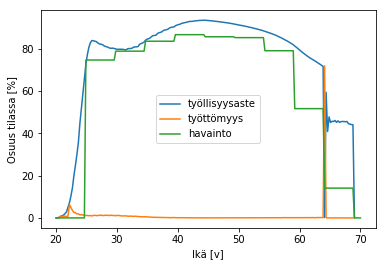

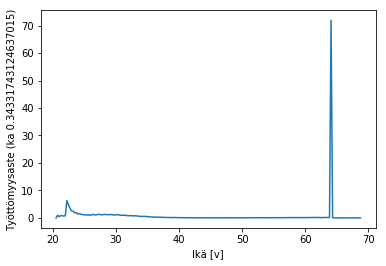

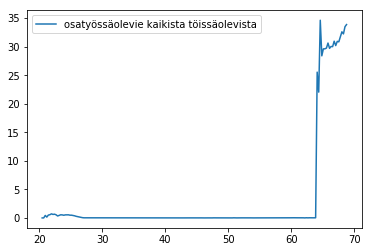

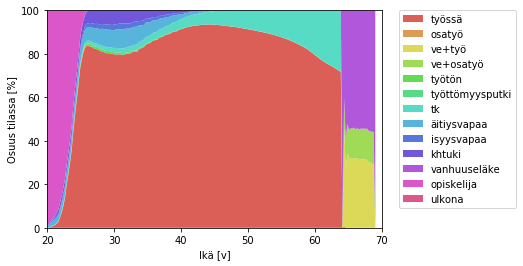

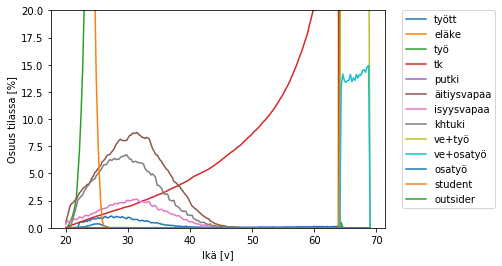

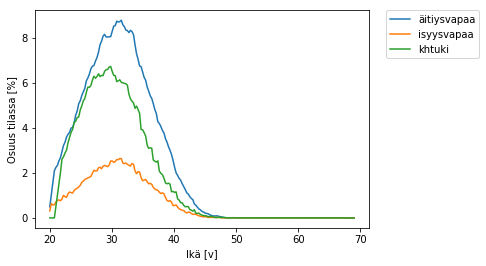

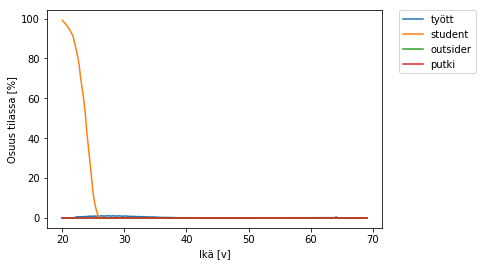

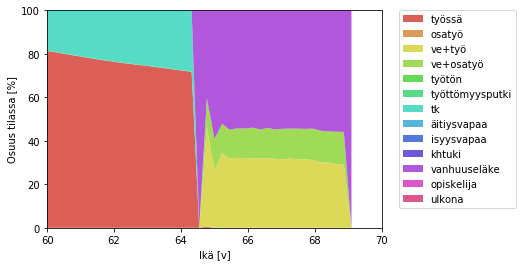

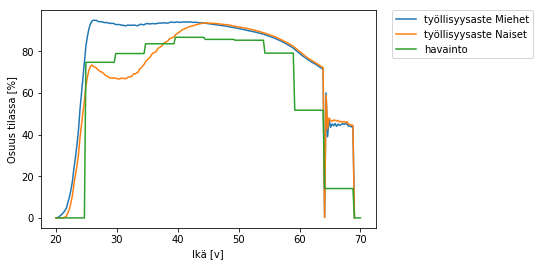

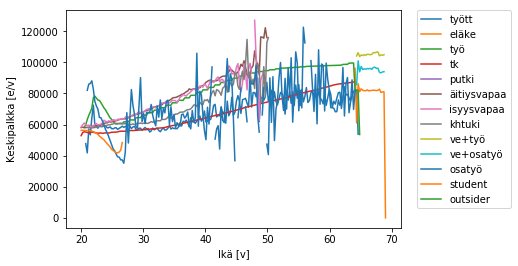

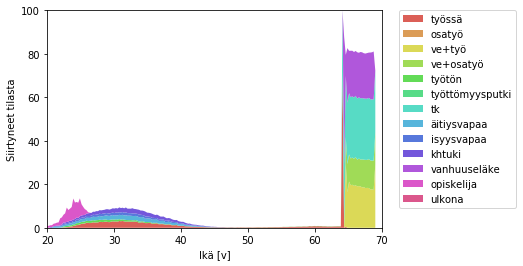

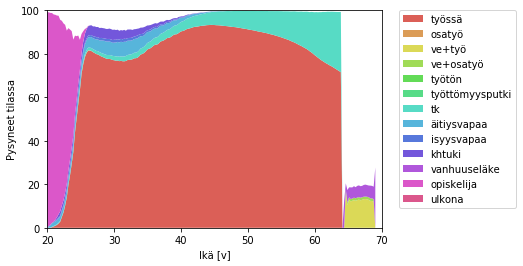

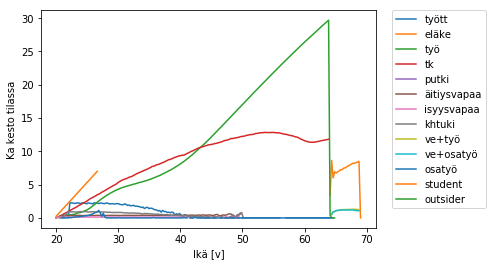

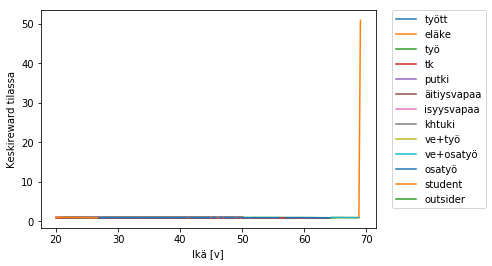

No handles with labels found to put in legend.


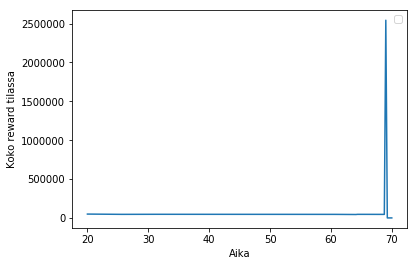

Yhteensä reward 237.67873654300806


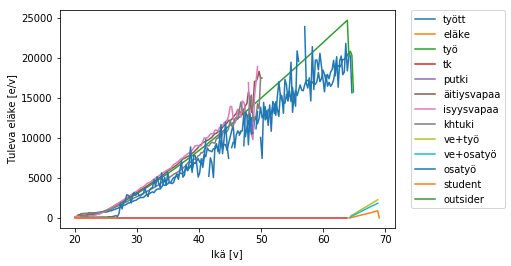

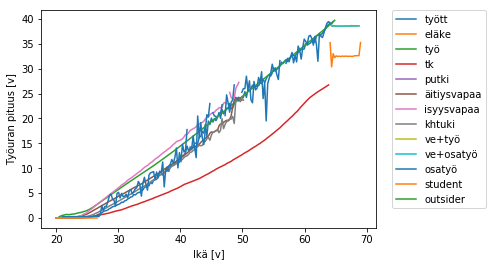

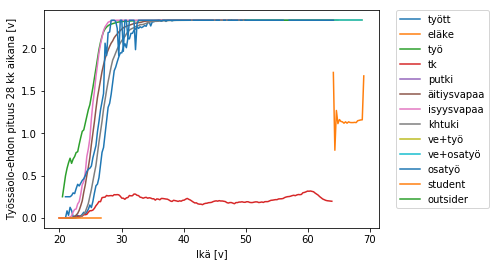

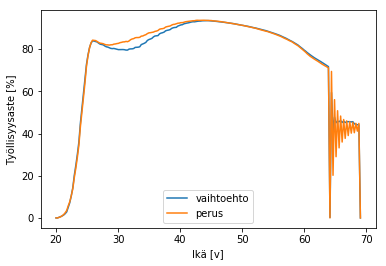

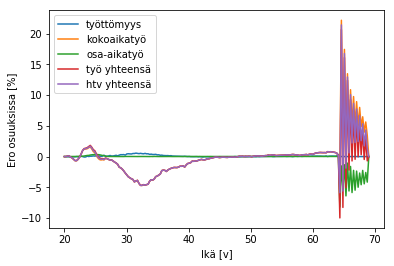

Työllisyysvaikutus 30-63-vuotiaisiin noin -21236.0 htv ja -21138.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -2.867207517840331 prosenttia
Epävarmuus työllisyysasteissa 0.008765386471799176, hajonta 0.051726174683473986


In [7]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                      train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_putki',
                      plot=True,results='results/putki_results',start_from=perusmalli,cont=True,
                      callback_minsteps=callback_minsteps)
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1)                    

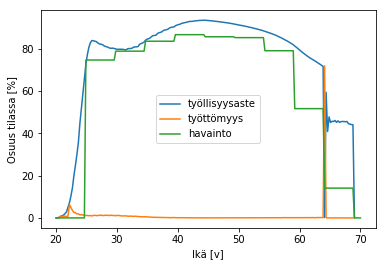

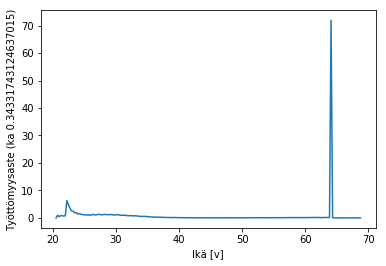

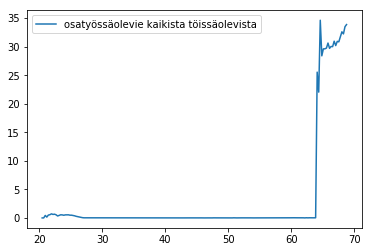

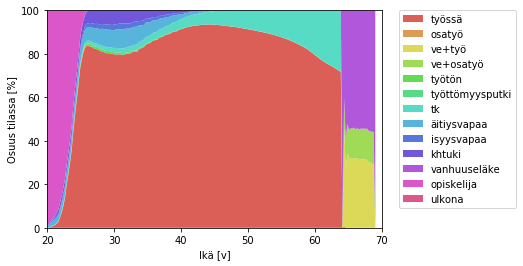

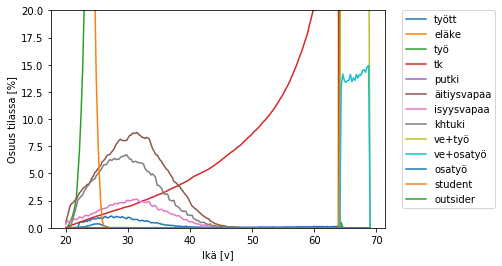

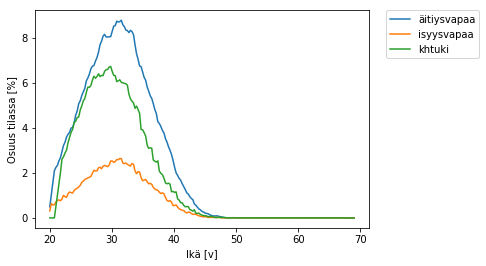

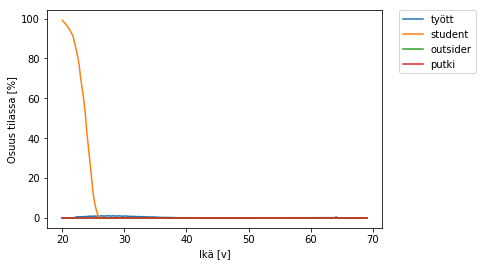

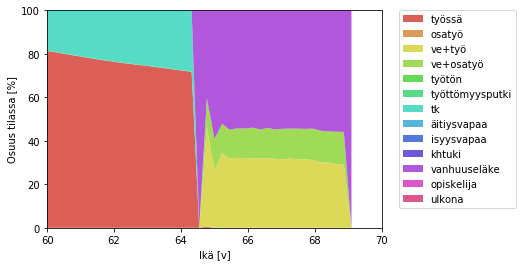

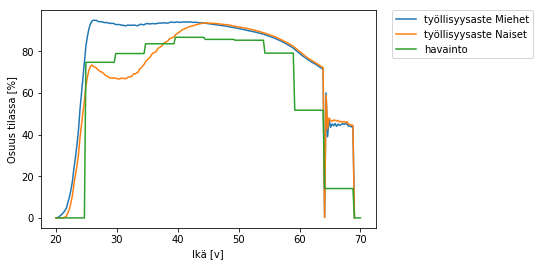

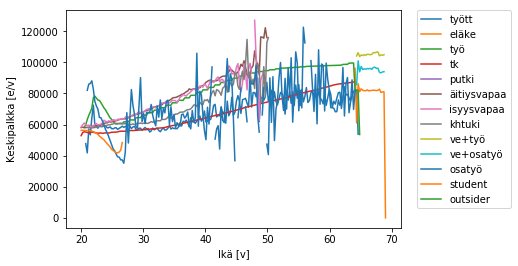

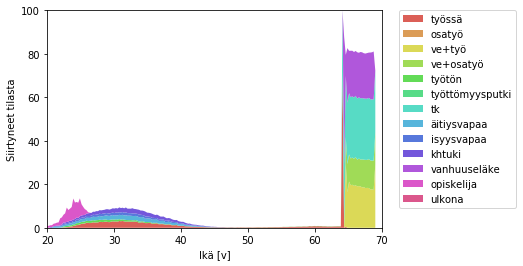

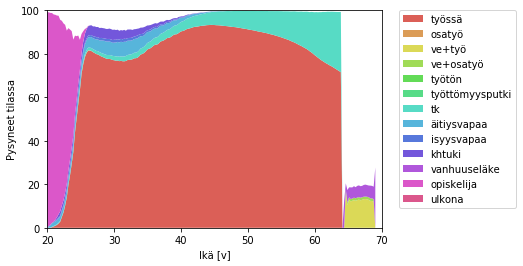

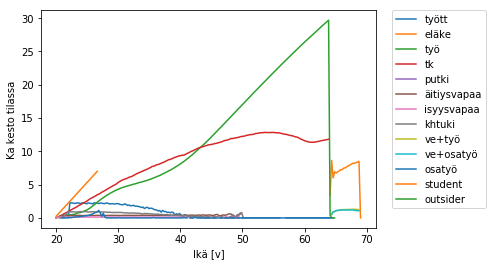

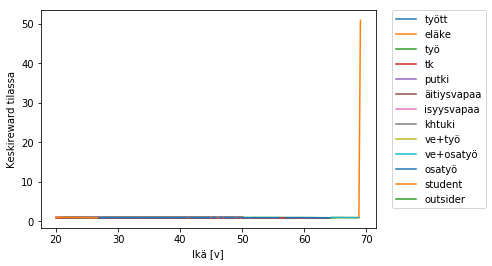

No handles with labels found to put in legend.


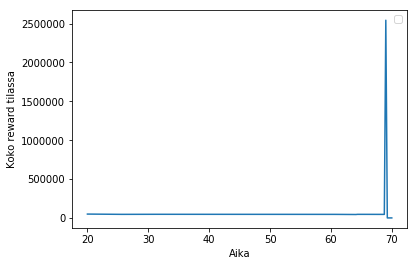

Yhteensä reward 237.67873654300806


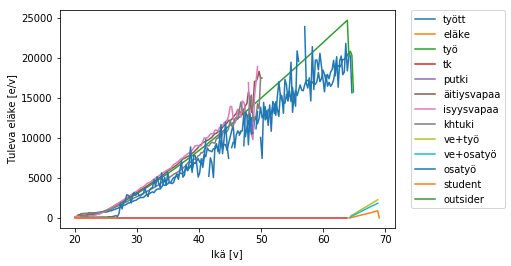

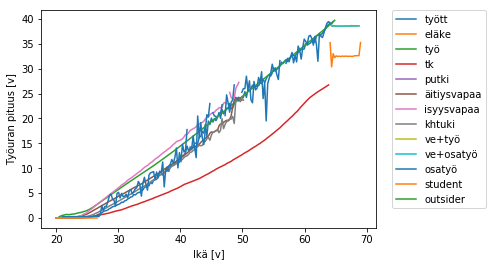

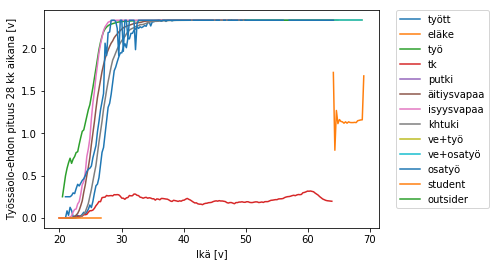

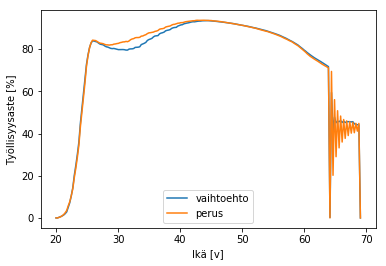

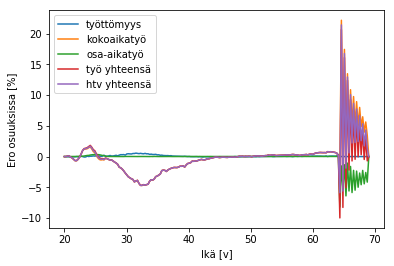

Työllisyysvaikutus 30-63-vuotiaisiin noin -21236.0 htv ja -21138.0 työllistä
Työllisyysastevaikutus 30-63-vuotiailla noin -2.867207517840331 prosenttia
Epävarmuus työllisyysasteissa 0.008765386471799176, hajonta 0.051726174683473986


In [8]:
cc1_putki.render(load='results/putki_results')
cc1_putki.compare_with(cc1) 

# EK:n malli

Lasketaan vertailukelpoiset työllisyysasteet EK:n ehdottamalla mallilla. Mallissa on toteuttu muutoksia ansiosidonnaiseen työttömyysturvaan, asumistukeen, toimeentulotukeen ja verotukseen.

In [9]:
cc2=Lifecycle(env='unemploymentEK-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc2.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_ek',plot=True,
                results='results/ek_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc2.render(load='results/ek_results')
cc2.load_sim(load='results/ek_results')

No mortality included
train...
phase 1
batch 1 learning rate 0.25 scaled 0.25
training...
---------------------------------
| explained_variance | 0.981    |
| fps                | 1490     |
| nupdates           | 1        |
| policy_entropy     | 0.0688   |
| policy_loss        | 0.00221  |
| total_timesteps    | 0        |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.461    |
| fps                | 2567     |
| nupdates           | 10       |
| policy_entropy     | 0.205    |
| policy_loss        | -0.545   |
| total_timesteps    | 22149    |
| value_loss         | 11.1     |
---------------------------------
---------------------------------
| explained_variance | 0.892    |
| fps                | 2298     |
| nupdates           | 20       |
| policy_entropy     | 0.107    |
| policy_loss        | 0.366    |
| total_timesteps    | 46759    |
| value_loss         | 11.6     |
--------------------------

---------------------------------
| explained_variance | 0.952    |
| fps                | 2091     |
| nupdates           | 270      |
| policy_entropy     | 0.232    |
| policy_loss        | -0.00674 |
| total_timesteps    | 662009   |
| value_loss         | 0.585    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2092     |
| nupdates           | 280      |
| policy_entropy     | 0.143    |
| policy_loss        | -0.00308 |
| total_timesteps    | 686619   |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2092     |
| nupdates           | 290      |
| policy_entropy     | 0.116    |
| policy_loss        | -0.00459 |
| total_timesteps    | 711229   |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps         

---------------------------------
| explained_variance | 0.928    |
| fps                | 2087     |
| nupdates           | 540      |
| policy_entropy     | 0.274    |
| policy_loss        | -0.00035 |
| total_timesteps    | 1326479  |
| value_loss         | 0.645    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 2087     |
| nupdates           | 550      |
| policy_entropy     | 0.237    |
| policy_loss        | -0.00431 |
| total_timesteps    | 1351089  |
| value_loss         | 0.616    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2087     |
| nupdates           | 560      |
| policy_entropy     | 0.203    |
| policy_loss        | -0.011   |
| total_timesteps    | 1375699  |
| value_loss         | 0.486    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2086     |
| nupdates           | 810      |
| policy_entropy     | 0.18     |
| policy_loss        | 0.00796  |
| total_timesteps    | 1990949  |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2086     |
| nupdates           | 820      |
| policy_entropy     | 0.207    |
| policy_loss        | -0.0101  |
| total_timesteps    | 2015559  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 2086     |
| nupdates           | 830      |
| policy_entropy     | 0.163    |
| policy_loss        | -0.00834 |
| total_timesteps    | 2040169  |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

----------------------------------
| explained_variance | 0.971     |
| fps                | 2087      |
| nupdates           | 1080      |
| policy_entropy     | 0.161     |
| policy_loss        | -0.000557 |
| total_timesteps    | 2655419   |
| value_loss         | 0.338     |
----------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2087     |
| nupdates           | 1090     |
| policy_entropy     | 0.122    |
| policy_loss        | 0.00363  |
| total_timesteps    | 2680029  |
| value_loss         | 0.303    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2087     |
| nupdates           | 1100     |
| policy_entropy     | 0.147    |
| policy_loss        | 0.000339 |
| total_timesteps    | 2704639  |
| value_loss         | 0.44     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps

---------------------------------
| explained_variance | 0.965    |
| fps                | 2087     |
| nupdates           | 1350     |
| policy_entropy     | 0.191    |
| policy_loss        | -0.00408 |
| total_timesteps    | 3319889  |
| value_loss         | 0.45     |
---------------------------------
----------------------------------
| explained_variance | 0.983     |
| fps                | 2087      |
| nupdates           | 1360      |
| policy_entropy     | 0.148     |
| policy_loss        | -0.000782 |
| total_timesteps    | 3344499   |
| value_loss         | 0.278     |
----------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 2087     |
| nupdates           | 1370     |
| policy_entropy     | 0.264    |
| policy_loss        | -0.00871 |
| total_timesteps    | 3369109  |
| value_loss         | 0.585    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps

---------------------------------
| explained_variance | 0.97     |
| fps                | 2089     |
| nupdates           | 1620     |
| policy_entropy     | 0.271    |
| policy_loss        | 0.00703  |
| total_timesteps    | 3984359  |
| value_loss         | 0.406    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2089     |
| nupdates           | 1630     |
| policy_entropy     | 0.194    |
| policy_loss        | -0.00437 |
| total_timesteps    | 4008969  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.927    |
| fps                | 2089     |
| nupdates           | 1640     |
| policy_entropy     | 0.299    |
| policy_loss        | -0.00377 |
| total_timesteps    | 4033579  |
| value_loss         | 0.966    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2090     |
| nupdates           | 1890     |
| policy_entropy     | 0.247    |
| policy_loss        | 0.00235  |
| total_timesteps    | 4648829  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2090     |
| nupdates           | 1900     |
| policy_entropy     | 0.132    |
| policy_loss        | -0.0102  |
| total_timesteps    | 4673439  |
| value_loss         | 0.172    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2090     |
| nupdates           | 1910     |
| policy_entropy     | 0.154    |
| policy_loss        | 0.0148   |
| total_timesteps    | 4698049  |
| value_loss         | 0.356    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2090     |
| nupdates           | 2160     |
| policy_entropy     | 0.174    |
| policy_loss        | -0.00721 |
| total_timesteps    | 5313299  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 2090     |
| nupdates           | 2170     |
| policy_entropy     | 0.401    |
| policy_loss        | -0.0128  |
| total_timesteps    | 5337909  |
| value_loss         | 0.489    |
---------------------------------
----------------------------------
| explained_variance | 0.959     |
| fps                | 2090      |
| nupdates           | 2180      |
| policy_entropy     | 0.27      |
| policy_loss        | -2.95e-05 |
| total_timesteps    | 5362519   |
| value_loss         | 0.544     |
----------------------------------
----------------------------------
| explained_variance | 0.983     |
| f

---------------------------------
| explained_variance | 0.946    |
| fps                | 2090     |
| nupdates           | 2430     |
| policy_entropy     | 0.271    |
| policy_loss        | 0.00203  |
| total_timesteps    | 5977769  |
| value_loss         | 0.475    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2089     |
| nupdates           | 2440     |
| policy_entropy     | 0.164    |
| policy_loss        | -0.00054 |
| total_timesteps    | 6002379  |
| value_loss         | 0.453    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2089     |
| nupdates           | 2450     |
| policy_entropy     | 0.218    |
| policy_loss        | -0.00312 |
| total_timesteps    | 6026989  |
| value_loss         | 0.404    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2089     |
| nupdates           | 2700     |
| policy_entropy     | 0.231    |
| policy_loss        | -0.00697 |
| total_timesteps    | 6642239  |
| value_loss         | 0.231    |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 2088     |
| nupdates           | 2710     |
| policy_entropy     | 0.282    |
| policy_loss        | 0.000152 |
| total_timesteps    | 6666849  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2088     |
| nupdates           | 2720     |
| policy_entropy     | 0.191    |
| policy_loss        | -0.0185  |
| total_timesteps    | 6691459  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2086     |
| nupdates           | 2970     |
| policy_entropy     | 0.292    |
| policy_loss        | 0.00023  |
| total_timesteps    | 7306709  |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 2085     |
| nupdates           | 2980     |
| policy_entropy     | 0.24     |
| policy_loss        | -0.00686 |
| total_timesteps    | 7331319  |
| value_loss         | 0.495    |
---------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps                | 2085     |
| nupdates           | 2990     |
| policy_entropy     | 0.248    |
| policy_loss        | 0.00165  |
| total_timesteps    | 7355929  |
| value_loss         | 0.395    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2080     |
| nupdates           | 3240     |
| policy_entropy     | 0.171    |
| policy_loss        | -0.00348 |
| total_timesteps    | 7971179  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2079     |
| nupdates           | 3250     |
| policy_entropy     | 0.203    |
| policy_loss        | -0.00138 |
| total_timesteps    | 7995789  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2079     |
| nupdates           | 3260     |
| policy_entropy     | 0.168    |
| policy_loss        | -0.00178 |
| total_timesteps    | 8020399  |
| value_loss         | 0.302    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

----------------------------------
| explained_variance | 0.947     |
| fps                | 2071      |
| nupdates           | 3510      |
| policy_entropy     | 0.176     |
| policy_loss        | -0.000392 |
| total_timesteps    | 8635649   |
| value_loss         | 0.394     |
----------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2071     |
| nupdates           | 3520     |
| policy_entropy     | 0.196    |
| policy_loss        | 0.000487 |
| total_timesteps    | 8660259  |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2070     |
| nupdates           | 3530     |
| policy_entropy     | 0.226    |
| policy_loss        | -0.00683 |
| total_timesteps    | 8684869  |
| value_loss         | 0.367    |
---------------------------------
----------------------------------
| explained_variance | 0.958     |
| f

---------------------------------
| explained_variance | 0.918    |
| fps                | 2058     |
| nupdates           | 3780     |
| policy_entropy     | 0.409    |
| policy_loss        | -0.00517 |
| total_timesteps    | 9300119  |
| value_loss         | 0.624    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2057     |
| nupdates           | 3790     |
| policy_entropy     | 0.24     |
| policy_loss        | -0.00187 |
| total_timesteps    | 9324729  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2057     |
| nupdates           | 3800     |
| policy_entropy     | 0.197    |
| policy_loss        | -0.00397 |
| total_timesteps    | 9349339  |
| value_loss         | 0.218    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-414b26527953>", line 6, in <module>
    callback_minsteps=callback_minsteps)
  File "/Volumes/Transcend/GitHub/lifecycle-rl/lifecycle_rl/lifecycle.py", line 643, in run_results
    cont=cont,start_from=start_from)
  File "/Volumes/Transcend/GitHub/lifecycle-rl/lifecycle_rl/lifecycle.py", line 669, in run_protocol
    log_interval=10,verbose=1)
  File "/Volumes/Transcend/GitHub/lifecycle-rl/lifecycle_rl/lifecycle.py", line 430, in train
    model.learn(total_timesteps=steps, log_interval=log_interval)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/stable_baselines/acktr/acktr.py", line 333, in learn
    writer)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages

KeyboardInterrupt: 

In [ ]:
cc2.compare_with(cc1)
#print(cc1.episodestats.empstate/cc1.n_pop,cc2.episodestats.empstate/cc2.n_pop)
#cc2.episodestats.load_sim('results/ek_res__best')
#cc2.episodestats.render()

# Verifiointi

Ajetaan sama simulaatio kaksi kertaa ja tarkastetaan että tulokset ovat sama. Tässä ideana on varmistaa, että satunnaisuus ei sotke tulosten arviointia.

# Työssäoloehdon pituus 12 kk

Entä jos työssäoloehto olisikin 12 kuukautta pitkä nykyisen 6 kuukauden sijaan?

In [ ]:
cc1_toe=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_toe=1.0,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_toe.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,save='best/best_12kk',plot=True,
                    results='results/12kk_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_toe.render(load='results/12kk_results')
cc1_toe.compare_with(cc1)

# Ansiosidonnaisen päivärahan lyhennys 50 pv

Tarkastellaan, miten työllisyyteen vaikuttaisi ansiosidonnaisen päivärahan lyhentäminen 50 päivällä. Tällöin alle kolmen vuoden työhistorialla ansiosidonnaisen päivärahan enimmäiskesto olisi 250 pv ja pidemmällä työhistorialla enimmäiskesto olisi 350 pv.

In [ ]:
cc1_350=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=250,ansiopvraha_kesto400=350,
                  mortality=mortality,perustulo=False,randomness=randomness)
cc1_350.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,save='best/malli_50pv',plot=True,
                    results='results/50pv_results',start_from=perusmalli,cont=True,
                    callback_minsteps=callback_minsteps)
cc1_350.render(load='results/50pv_results')
cc1_350.compare_with(cc1)

# Perustulo

In [ ]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_pt',plot=True,
                   results='results/perustulo_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_pt.render(load='results/perustulo_results')
cc1_pt.compare_with(cc1)

# 300 vs 400 päivän kesto ansiosidonnaisessa

Mikä on alle kolmen vuoden työhistorian lyhyemmän (300 pv) ansiosidonnaisen päivärahan enimmäiskeston vaikutus työllisyyteen? Kokeillaan miten työllisyyteen vaikuttaisi sen pidentäminen 400 päivään.

In [ ]:
cc1_400=Lifecycle(env='unemployment-v1',minimal=False,ansiopvraha_kesto300=400,mortality=mortality,
                  perustulo=False,randomness=randomness)
cc1_400.run_results(debug=False,steps1=size3,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=True,predict=True,batch1=batch1,batch2=batch2,save='best/malli_300pv',plot=True,
                    results='results/300pv_results',start_from=perusmalli,cont=True,
                callback_minsteps=callback_minsteps)
cc1_400.render(load='results/300pv_results')
cc1_400.compare_with(cc1)